# Analysis of the Iris Dataset

Author: gerry callaghan

# imports


In [1]:

# pandas helps to construct dataframes/arrays
import pandas as pd
# numpy performs various mathematical operations with arrays 
import numpy as np
# pyplot from the matplotlib library helps for plotting graphs etc
import matplotlib.pyplot as plt
# scipy for scientific computing, in particular for calcuting the R-squared..
import scipy as sp
# seaborn - which is similar to matplotlib - great for pairplots
import seaborn as sns

## Task 1: Source the Data Set

 I know from reading the description of the data here (https://archive.ics.uci.edu/dataset/53/iris),  that there are 150 instances (or observations as I call them). Each observation has recorded four features and one class attribute. According to UC Irvine, the dataset contains 3 classes,so  each class has 50 observations (150/3). One class (Setosa) is linearly separable from the other 2; the latter are not linearly separable from each other.

Therefore, the data contains 5 columns, the 4 features (sepal_length, sepal_width, petal_length, petal_width), and finally the species/class of iris. 

Let's create an array with those names which we will then append to the top of the raw data that we pull in from the textfile from UC Irvine.

In [2]:
col_names= ("sepal_length",
    "sepal_width", 
    "petal_length", 
    "petal_width", 
    "class", 
)

Import the Iris dataset from a github site (ordinarily I would import the scikit-learn library, and import the dataset from sklearn, but as referenced in class, a user on github has already done some preparatory work on the dataset). We would then ordinarily assign to a variable name the data we loaded (in my case iris_df), in the form of a pandas dataframe, and pandas displays the data in a table. 

However, in this example, while I'm using the data from Github where someone had written in the names of the four different characteristics (sepal length, sepal width, petal length, and petal width) and the species which comprises three classes, I'm assigning my own names. I do this by telling the computer to import the data from a csv file, where the data is separated by a comma, and to replace the existing header names with header names from an array I created earlier called col_names.

In [3]:
#Load the iris dataset in as a dataframe. we can do this using the Pandas library which is used for data manipulation.
iris_df = pd.read_csv ("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv", sep=',', header=0, names=col_names)


The pd.read_csv () imports in as a dataframe the data from an external source (in this case a csv file in the hyperlink) .

 This has now loaded the data into iris_df so we have the data in our jupyter notebook


## Task 2: Explore the Data Structure

I'm going to print the first and last 5 rows of the data, the feature names, and the target classes, just so i can see the right number of rows has imported

In [ ]:
#df.head() 

print(f"{iris_df}") 



     sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


I can see the first four columns are numeric data comprising the sepal/petal length/width and then I have a column of alphabetical data in the iris class - exactly as described in the accompaning documentation. More importantly, I can see that everything has been sorted by the class column, so no need for me to sort again.  


In [5]:
# Use "drop na" to remove any observations in the series that have no value
iris_df.dropna(inplace=True)
# Show the data again to see if there was any change, that is rows removed
print(f"{iris_df}") 


     sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Everything looks fine for me to work with the data now.

Double check that there are definitely 5 variables.

In [6]:
iris_df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

and the number of observations is

In [7]:
# Again, showing there are 150 rows or observations.
iris_df["class"].shape

(150,)

so, there are 150 observations, five columns, so it has a shape of 150 x 5 


In [8]:
# Confirm three are three unique species
print(f"{iris_df["class"].nunique()}")


3


Yes there are three unique classes/species of iris, which matches with the attribute information in the data file that said there are Iris Setosa, Iris Versicolour, and Iris Virginica


In [ ]:
# Confirm each class/species has exactly 50 observations by using a quick while command (I could perhaps just create a function and call the function for each iris class)
count_setosa = 0
count_versicolor = 0
count_virginica = 0
max_rows=iris_df["class"].size

line_number = 0

# so what I will do, is sequentially go through each line,
# assess what class of iris is written in the class column
# then increment that line to one of the three classes arrays
while line_number < max_rows:
    if iris_df["class"][line_number] == "setosa":
        count_setosa = count_setosa + 1
        line_number = line_number + 1
    elif iris_df["class"][line_number] == "versicolor":
        count_versicolor = count_versicolor + 1 
        line_number = line_number + 1
    elif iris_df["class"][line_number] == "virginica":
        count_virginica = count_virginica + 1
        line_number = line_number + 1
    else :
        print(f"You have a typo in line {line_number}") # if i see this line printed out, it means I have a typo
        line_number = line_number + 1
 
print (f"\nClass of Iris\tObervations \nSetosa:\t\t{count_setosa}\nVersicolor:\t{count_versicolor} \nVirginica:\t{count_virginica}")


Class of Iris	Obervations 
Setosa:		50
Versicolor:	50 
Virginica:	50


This confirms that there are 50 observations of each, so I can be confident that there were no typos in the class names.

## Task 3: Summarize the Data

The dataset can be summarized, in terms of its central tendencies etc, as follows:


In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Ronald Fisher in his classic 1936 paper, "The Use of Multiple Measurements in Taxonomic Problems" used this dataset, because based on the combination of the four measurement features, he could show one species (Setosa) was linearly separable from the other two, which were not linearly separable from each other. 
The idea that one species was linerly separable from the other two made it an ideal sample for Fisher to use, because he wanted to find the best linear combination of independent variables that will discriminate between the categories of the dependent variables, and determine if significant differences exists among the groups of predictor variables. 

 I'm therefore going to separate each class into its own array, and then look at the characteristics to show how they differ from one another.

In [11]:
# A function for creating arrays for each class of iris, this function "creating_array" incrementally appends each line of the data to the existing array
# I'm going to do what i would do in Visual Basic and do it long hand because the append function won't work for me :-( 

def creating_array(DataFrame,min,max):
    row_number = min # starting row of the dataframe for the relevant iris class
    output_array = [] # initilise the final array as being blank
    
    while row_number < max: # while the row number of the dataframe is less than the last row of data for that respective iris class (0-50,50-100,100-150)
         current_row_of_data = iris_df["sepal_length"][row_number],iris_df["sepal_width"][row_number],iris_df["petal_length"][row_number],iris_df["petal_width"][row_number]
         row_number = row_number + 1
         output_array = output_array + [current_row_of_data]
    return output_array

# so now I'm going to call the above function to create an array for each class, 

min =0 # header row is ignored
max_setosa = count_setosa # above I calculated that Setosa had 50 rows, remembering the fence post rule - python read to the number BEFORE the last
setosa = np.array(creating_array(iris_df, min,max=max_setosa)) # so to the function, I send the dataframe, the starting point, and the last row for setosa which is 50 ( which is rows 0 - 49)
max_versicolor = max_setosa + count_versicolor # so now I know Versicolor starts after Setosa, so the last row must be where count setosa + count versicolor combined, ie 100
versicolor = np.array(creating_array(iris_df, min=max_setosa,max = max_versicolor)) # so to the function, we send the dataframe, the starting point and the end point for versicolor (rows 50 - 99)
max_virginica = max_versicolor + count_virginica # so now we know virginica starts after versicolor, so the last row must be the previous two combined + count versicolor combined, ie 150
virginica = np.array(creating_array(iris_df, min=max_versicolor,max =max_virginica)) # so to the function, we send the dataframe, the starting point and the end point for virginica (rows 100 - 149)

# Compare each of our arrays against that of source spreadsheet
#print(f"The array for Setosa is:\n{setosa}\n\nThe array for Versicolor is:\n{versicolor}\n\nThe array for Virginica is:\n{virginica}")
# the rows all look good for each class

# Create an array for iris, which in turn comprises the three arrays for setosa, versicolor and virginica
# iris = [setosa,versicolor,virginica]
# print(f"This is what an overall array comprising of 150 observations looks like: {iris}")
# okay, this matches the source data

### Descriptive Statistics for each of our Four Features are as follows:

Create an array for each class of iris and feature, and then the summary statistics can be calculated for that class and feature.

In [12]:
#*************************************************************************************************************************************
# Sepal Lengths
#*************************************************************************************************************************************
# Take each of the numpy arrays we just calculated, then state the row number (between 0-150) and column number (between 0-4)
setosa_sepal_length=np.array([setosa[0][0],setosa[1][0],setosa[2][0],setosa[3][0],setosa[4][0],setosa[5][0],setosa[6][0],setosa[7][0],setosa[8][0],setosa[9][0],setosa[10][0],setosa[11][0],setosa[12][0],setosa[13][0],setosa[14][0],setosa[15][0],setosa[16][0],setosa[17][0],setosa[18][0],setosa[19][0],setosa[20][0],setosa[21][0],setosa[22][0],setosa[23][0],setosa[24][0],setosa[25][0],setosa[26][0],setosa[27][0],setosa[28][0],setosa[29][0],setosa[30][0],setosa[31][0],setosa[32][0],setosa[33][0],setosa[34][0],setosa[35][0],setosa[36][0],setosa[37][0],setosa[38][0],setosa[39][0],setosa[40][0],setosa[41][0],setosa[42][0],setosa[43][0],setosa[44][0],setosa[45][0],setosa[46][0],setosa[47][0],setosa[48][0],setosa[49][0]])
#print(f"Setosa Sepal Lengths are:\n {setosa_sepal_length}\n")
versicolor_sepal_length=np.array([versicolor[0][0],versicolor[1][0],versicolor[2][0],versicolor[3][0],versicolor[4][0],versicolor[5][0],versicolor[6][0],versicolor[7][0],versicolor[8][0],versicolor[9][0],versicolor[10][0],versicolor[11][0],versicolor[12][0],versicolor[13][0],versicolor[14][0],versicolor[15][0],versicolor[16][0],versicolor[17][0],versicolor[18][0],versicolor[19][0],versicolor[20][0],versicolor[21][0],versicolor[22][0],versicolor[23][0],versicolor[24][0],versicolor[25][0],versicolor[26][0],versicolor[27][0],versicolor[28][0],versicolor[29][0],versicolor[30][0],versicolor[31][0],versicolor[32][0],versicolor[33][0],versicolor[34][0],versicolor[35][0],versicolor[36][0],versicolor[37][0],versicolor[38][0],versicolor[39][0],versicolor[40][0],versicolor[41][0],versicolor[42][0],versicolor[43][0],versicolor[44][0],versicolor[45][0],versicolor[46][0],versicolor[47][0],versicolor[48][0],versicolor[49][0]])
#print(f"Versicolor Sepal Lengths are:\n {versicolor_sepal_length}\n")
virginica_sepal_length=np.array([virginica[0][0],virginica[1][0],virginica[2][0],virginica[3][0],virginica[4][0],virginica[5][0],virginica[6][0],virginica[7][0],virginica[8][0],virginica[9][0],virginica[10][0],virginica[11][0],virginica[12][0],virginica[13][0],virginica[14][0],virginica[15][0],virginica[16][0],virginica[17][0],virginica[18][0],virginica[19][0],virginica[20][0],virginica[21][0],virginica[22][0],virginica[23][0],virginica[24][0],virginica[25][0],virginica[26][0],virginica[27][0],virginica[28][0],virginica[29][0],virginica[30][0],virginica[31][0],virginica[32][0],virginica[33][0],virginica[34][0],virginica[35][0],virginica[36][0],virginica[37][0],virginica[38][0],virginica[39][0],virginica[40][0],virginica[41][0],virginica[42][0],virginica[43][0],virginica[44][0],virginica[45][0],virginica[46][0],virginica[47][0],virginica[48][0],virginica[49][0]])
#print(f"Virginica Sepal Lengths are:\n {virginica_sepal_length}")
overall_sepal_length= iris_df["sepal_length"]

#*************************************************************************************************************************************
# Sepal Widths
#*************************************************************************************************************************************
# Take each of the numpy arrays we just calculated, then state the row number (between 0-150) and column number (between 0-4)
setosa_sepal_width=np.array([setosa[0][1],setosa[1][1],setosa[2][1],setosa[3][1],setosa[4][1],setosa[5][1],setosa[6][1],setosa[7][1],setosa[8][1],setosa[9][1],setosa[10][1],setosa[11][1],setosa[12][1],setosa[13][1],setosa[14][1],setosa[15][1],setosa[16][1],setosa[17][1],setosa[18][1],setosa[19][1],setosa[20][1],setosa[21][1],setosa[22][1],setosa[23][1],setosa[24][1],setosa[25][1],setosa[26][1],setosa[27][1],setosa[28][1],setosa[29][1],setosa[30][1],setosa[31][1],setosa[32][1],setosa[33][1],setosa[34][1],setosa[35][1],setosa[36][1],setosa[37][1],setosa[38][1],setosa[39][1],setosa[40][1],setosa[41][1],setosa[42][1],setosa[43][1],setosa[44][1],setosa[45][1],setosa[46][1],setosa[47][1],setosa[48][1],setosa[49][1]])
#print(f"\nSetosa Sepal widths are:\n {setosa_sepal_width}\n")
versicolor_sepal_width=np.array([versicolor[0][1],versicolor[1][1],versicolor[2][1],versicolor[3][1],versicolor[4][1],versicolor[5][1],versicolor[6][1],versicolor[7][1],versicolor[8][1],versicolor[9][1],versicolor[10][1],versicolor[11][1],versicolor[12][1],versicolor[13][1],versicolor[14][1],versicolor[15][1],versicolor[16][1],versicolor[17][1],versicolor[18][1],versicolor[19][1],versicolor[20][1],versicolor[21][1],versicolor[22][1],versicolor[23][1],versicolor[24][1],versicolor[25][1],versicolor[26][1],versicolor[27][1],versicolor[28][1],versicolor[29][1],versicolor[30][1],versicolor[31][1],versicolor[32][1],versicolor[33][1],versicolor[34][1],versicolor[35][1],versicolor[36][1],versicolor[37][1],versicolor[38][1],versicolor[39][1],versicolor[40][1],versicolor[41][1],versicolor[42][1],versicolor[43][1],versicolor[44][1],versicolor[45][1],versicolor[46][1],versicolor[47][1],versicolor[48][1],versicolor[49][1]])
#print(f"Versicolor Sepal widths are:\n {versicolor_sepal_width}\n")
virginica_sepal_width=np.array([virginica[0][1],virginica[1][1],virginica[2][1],virginica[3][1],virginica[4][1],virginica[5][1],virginica[6][1],virginica[7][1],virginica[8][1],virginica[9][1],virginica[10][1],virginica[11][1],virginica[12][1],virginica[13][1],virginica[14][1],virginica[15][1],virginica[16][1],virginica[17][1],virginica[18][1],virginica[19][1],virginica[20][1],virginica[21][1],virginica[22][1],virginica[23][1],virginica[24][1],virginica[25][1],virginica[26][1],virginica[27][1],virginica[28][1],virginica[29][1],virginica[30][1],virginica[31][1],virginica[32][1],virginica[33][1],virginica[34][1],virginica[35][1],virginica[36][1],virginica[37][1],virginica[38][1],virginica[39][1],virginica[40][1],virginica[41][1],virginica[42][1],virginica[43][1],virginica[44][1],virginica[45][1],virginica[46][1],virginica[47][1],virginica[48][1],virginica[49][1]])
#print(f"Virginica Sepal widths are:\n {virginica_sepal_width}")
overall_sepal_width= iris_df["sepal_width"]

#*************************************************************************************************************************************
# Petal Lengths
#*************************************************************************************************************************************
# Take each of the numpy arrays we just calculated, then state the row number (between 0-150) and column number (between 0-4)
setosa_petal_length=np.array([setosa[0][2],setosa[1][2],setosa[2][2],setosa[3][2],setosa[4][2],setosa[5][2],setosa[6][2],setosa[7][2],setosa[8][2],setosa[9][2],setosa[10][2],setosa[11][2],setosa[12][2],setosa[13][2],setosa[14][2],setosa[15][2],setosa[16][2],setosa[17][2],setosa[18][2],setosa[19][2],setosa[20][2],setosa[21][2],setosa[22][2],setosa[23][2],setosa[24][2],setosa[25][2],setosa[26][2],setosa[27][2],setosa[28][2],setosa[29][2],setosa[30][2],setosa[31][2],setosa[32][2],setosa[33][2],setosa[34][2],setosa[35][2],setosa[36][2],setosa[37][2],setosa[38][2],setosa[39][2],setosa[40][2],setosa[41][2],setosa[42][2],setosa[43][2],setosa[44][2],setosa[45][2],setosa[46][2],setosa[47][2],setosa[48][2],setosa[49][2]])
#print(f"\nSetosa Petal Lengths are:\n {setosa_petal_length}")
versicolor_petal_length=np.array([versicolor[0][2],versicolor[1][2],versicolor[2][2],versicolor[3][2],versicolor[4][2],versicolor[5][2],versicolor[6][2],versicolor[7][2],versicolor[8][2],versicolor[9][2],versicolor[10][2],versicolor[11][2],versicolor[12][2],versicolor[13][2],versicolor[14][2],versicolor[15][2],versicolor[16][2],versicolor[17][2],versicolor[18][2],versicolor[19][2],versicolor[20][2],versicolor[21][2],versicolor[22][2],versicolor[23][2],versicolor[24][2],versicolor[25][2],versicolor[26][2],versicolor[27][2],versicolor[28][2],versicolor[29][2],versicolor[30][2],versicolor[31][2],versicolor[32][2],versicolor[33][2],versicolor[34][2],versicolor[35][2],versicolor[36][2],versicolor[37][2],versicolor[38][2],versicolor[39][2],versicolor[40][2],versicolor[41][2],versicolor[42][2],versicolor[43][2],versicolor[44][2],versicolor[45][2],versicolor[46][2],versicolor[47][2],versicolor[48][2],versicolor[49][2]])
#print(f"Versicolor Petal Lengths are:\n {versicolor_petal_length}\n")
virginica_petal_length=np.array([virginica[0][2],virginica[1][2],virginica[2][2],virginica[3][2],virginica[4][2],virginica[5][2],virginica[6][2],virginica[7][2],virginica[8][2],virginica[9][2],virginica[10][2],virginica[11][2],virginica[12][2],virginica[13][2],virginica[14][2],virginica[15][2],virginica[16][2],virginica[17][2],virginica[18][2],virginica[19][2],virginica[20][2],virginica[21][2],virginica[22][2],virginica[23][2],virginica[24][2],virginica[25][2],virginica[26][2],virginica[27][2],virginica[28][2],virginica[29][2],virginica[30][2],virginica[31][2],virginica[32][2],virginica[33][2],virginica[34][2],virginica[35][2],virginica[36][2],virginica[37][2],virginica[38][2],virginica[39][2],virginica[40][2],virginica[41][2],virginica[42][2],virginica[43][2],virginica[44][2],virginica[45][2],virginica[46][2],virginica[47][2],virginica[48][2],virginica[49][2]])
#print(f"Virginica Petal Lengths are:\n {virginica_petal_length}")
overall_petal_length=iris_df["petal_length"]

#*************************************************************************************************************************************
# Petal Widths
#*************************************************************************************************************************************
# Take each of the numpy arrays we just calculated, then state the row number (between 0-150) and column number (between 0-4)
setosa_petal_width=np.array([setosa[0][3],setosa[1][3],setosa[2][3],setosa[3][3],setosa[4][3],setosa[5][3],setosa[6][3],setosa[7][3],setosa[8][3],setosa[9][3],setosa[10][3],setosa[11][3],setosa[12][3],setosa[13][3],setosa[14][3],setosa[15][3],setosa[16][3],setosa[17][3],setosa[18][3],setosa[19][3],setosa[20][3],setosa[21][3],setosa[22][3],setosa[23][3],setosa[24][3],setosa[25][3],setosa[26][3],setosa[27][3],setosa[28][3],setosa[29][3],setosa[30][3],setosa[31][3],setosa[32][3],setosa[33][3],setosa[34][3],setosa[35][3],setosa[36][3],setosa[37][3],setosa[38][3],setosa[39][3],setosa[40][3],setosa[41][3],setosa[42][3],setosa[43][3],setosa[44][3],setosa[45][3],setosa[46][3],setosa[47][3],setosa[48][3],setosa[49][3]])
#print(f"\nSetosa Petal Widths are:\n {setosa_petal_width}\n")
versicolor_petal_width=np.array([versicolor[0][3],versicolor[1][3],versicolor[2][3],versicolor[3][3],versicolor[4][3],versicolor[5][3],versicolor[6][3],versicolor[7][3],versicolor[8][3],versicolor[9][3],versicolor[10][3],versicolor[11][3],versicolor[12][3],versicolor[13][3],versicolor[14][3],versicolor[15][3],versicolor[16][3],versicolor[17][3],versicolor[18][3],versicolor[19][3],versicolor[20][3],versicolor[21][3],versicolor[22][3],versicolor[23][3],versicolor[24][3],versicolor[25][3],versicolor[26][3],versicolor[27][3],versicolor[28][3],versicolor[29][3],versicolor[30][3],versicolor[31][3],versicolor[32][3],versicolor[33][3],versicolor[34][3],versicolor[35][3],versicolor[36][3],versicolor[37][3],versicolor[38][3],versicolor[39][3],versicolor[40][3],versicolor[41][3],versicolor[42][3],versicolor[43][3],versicolor[44][3],versicolor[45][3],versicolor[46][3],versicolor[47][3],versicolor[48][3],versicolor[49][3]])
#print(f"Versicolor Petal Widths are:\n {versicolor_petal_width}\n")
virginica_petal_width=np.array([virginica[0][3],virginica[1][3],virginica[2][3],virginica[3][3],virginica[4][3],virginica[5][3],virginica[6][3],virginica[7][3],virginica[8][3],virginica[9][3],virginica[10][3],virginica[11][3],virginica[12][3],virginica[13][3],virginica[14][3],virginica[15][3],virginica[16][3],virginica[17][3],virginica[18][3],virginica[19][3],virginica[20][3],virginica[21][3],virginica[22][3],virginica[23][3],virginica[24][3],virginica[25][3],virginica[26][3],virginica[27][3],virginica[28][3],virginica[29][3],virginica[30][3],virginica[31][3],virginica[32][3],virginica[33][3],virginica[34][3],virginica[35][3],virginica[36][3],virginica[37][3],virginica[38][3],virginica[39][3],virginica[40][3],virginica[41][3],virginica[42][3],virginica[43][3],virginica[44][3],virginica[45][3],virginica[46][3],virginica[47][3],virginica[48][3],virginica[49][3]])
#print(f"Virginica Petal Widths are:\n {virginica_petal_width}")
overall_petal_width=iris_df["petal_width"]



Here follows the number of iris, the mean or average of each of the four variables (sepal length, sepal width, petal length, and petal width), the standard deviation around the mean value, the minimum and maximum values, and finally the different quartiles, where the 50% quartile is the median value.

In [13]:
# numpy is used for performing all the mathematical calculations, i'm just inputing the array into the relevant function. 
# For presentation purposes, I'm rounding each of the values. 

#*************************************************************************************************************************************
# Sepal Lengths
#*************************************************************************************************************************************
# Print the Descriptive Statistics in a table
print(f"\nSepal Lengths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_sepal_length),2)}\t\t{round(np.mean(versicolor_sepal_length),2)}\t\t{round(np.mean(virginica_sepal_length),2)}\t\t{round(np.mean(overall_sepal_length),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_sepal_length),2)}\t\t{round(np.std(versicolor_sepal_length),2)}\t\t{round(np.std(virginica_sepal_length),2)}\t\t{round(np.std(overall_sepal_length),2)}")
print(f"Median:\t\t{round(np.median(setosa_sepal_length),2)}\t\t{round(np.median(versicolor_sepal_length),2)}\t\t{round(np.median(virginica_sepal_length),2)}\t\t{round(np.median(overall_sepal_length),2)}")
print(f"Minimum:\t{round(np.min(setosa_sepal_length),2)}\t\t{round(np.min(versicolor_sepal_length),2)}\t\t{round(np.min(virginica_sepal_length),2)}\t\t{round(np.min(overall_sepal_length),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_sepal_length,25),2)}\t\t{round(np.percentile(versicolor_sepal_length,25),2)}\t\t{round(np.percentile(virginica_sepal_length,25),2)}\t\t{round(np.percentile(overall_sepal_length,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_sepal_length,50),2)}\t\t{round(np.percentile(versicolor_sepal_length,50),2)}\t\t{round(np.percentile(virginica_sepal_length,50),2)}\t\t{round(np.percentile(overall_sepal_length,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_sepal_length,75),2)}\t\t{round(np.percentile(versicolor_sepal_length,75),2)}\t\t{round(np.percentile(virginica_sepal_length,75),2)}\t\t{round(np.percentile(overall_sepal_length,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_sepal_length),2)}\t\t{round(np.max(versicolor_sepal_length),2)}\t\t{round(np.max(virginica_sepal_length),2)}\t\t{round(np.max(overall_sepal_length),2)}\n")

# *************************************************************************************************************************************
# Sepal Widths
# *************************************************************************************************************************************
# Print the Descriptive Statistics in a table
print(f"\nSepal Widths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_sepal_width),2)}\t\t{round(np.mean(versicolor_sepal_width),2)}\t\t{round(np.mean(virginica_sepal_width),2)}\t\t{round(np.mean(overall_sepal_width),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_sepal_width),2)}\t\t{round(np.std(versicolor_sepal_width),2)}\t\t{round(np.std(virginica_sepal_width),2)}\t\t{round(np.std(overall_sepal_width),2)}")
print(f"Median:\t\t{round(np.median(setosa_sepal_width),2)}\t\t{round(np.median(versicolor_sepal_width),2)}\t\t{round(np.median(virginica_sepal_width),2)}\t\t{round(np.median(overall_sepal_width),2)}")
print(f"Minimum:\t{round(np.min(setosa_sepal_width),2)}\t\t{round(np.min(versicolor_sepal_width),2)}\t\t{round(np.min(virginica_sepal_width),2)}\t\t{round(np.min(overall_sepal_width),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_sepal_width,25),2)}\t\t{round(np.percentile(versicolor_sepal_width,25),2)}\t\t{round(np.percentile(virginica_sepal_width,25),2)}\t\t{round(np.percentile(overall_sepal_width,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_sepal_width,50),2)}\t\t{round(np.percentile(versicolor_sepal_width,50),2)}\t\t{round(np.percentile(virginica_sepal_width,50),2)}\t\t{round(np.percentile(overall_sepal_width,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_sepal_width,75),2)}\t\t{round(np.percentile(versicolor_sepal_width,75),2)}\t\t{round(np.percentile(virginica_sepal_width,75),2)}\t\t{round(np.percentile(overall_sepal_width,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_sepal_width),2)}\t\t{round(np.max(versicolor_sepal_width),2)}\t\t{round(np.max(virginica_sepal_width),2)}\t\t{round(np.max(overall_sepal_width),2)}\n")

# *************************************************************************************************************************************
# Petal Lengths
# *************************************************************************************************************************************
# Print the Descriptive Statistics in a table
print(f"\nPetal Length")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_petal_length),2)}\t\t{round(np.mean(versicolor_petal_length),2)}\t\t{round(np.mean(virginica_petal_length),2)}\t\t{round(np.mean(overall_petal_length),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_petal_length),2)}\t\t{round(np.std(versicolor_petal_length),2)}\t\t{round(np.std(virginica_petal_length),2)}\t\t{round(np.std(overall_petal_length),2)}")
print(f"Median:\t\t{round(np.median(setosa_petal_length),2)}\t\t{round(np.median(versicolor_petal_length),2)}\t\t{round(np.median(virginica_petal_length),2)}\t\t{round(np.median(overall_petal_length),2)}")
print(f"Minimum:\t{round(np.min(setosa_petal_length),2)}\t\t{round(np.min(versicolor_petal_length),2)}\t\t{round(np.min(virginica_petal_length),2)}\t\t{round(np.min(overall_petal_length),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_petal_length,25),2)}\t\t{round(np.percentile(versicolor_petal_length,25),2)}\t\t{round(np.percentile(virginica_petal_length,25),2)}\t\t{round(np.percentile(overall_petal_length,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_petal_length,50),2)}\t\t{round(np.percentile(versicolor_petal_length,50),2)}\t\t{round(np.percentile(virginica_petal_length,50),2)}\t\t{round(np.percentile(overall_petal_length,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_petal_length,75),2)}\t\t{round(np.percentile(versicolor_petal_length,75),2)}\t\t{round(np.percentile(virginica_petal_length,75),2)}\t\t{round(np.percentile(overall_petal_length,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_petal_length),2)}\t\t{round(np.max(versicolor_petal_length),2)}\t\t{round(np.max(virginica_petal_length),2)}\t\t{round(np.max(overall_petal_length),2)}\n")

# *************************************************************************************************************************************
# Petal Widths
# *************************************************************************************************************************************
# Print the Descriptive Statistics in a table
print(f"\nPetal Widths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_petal_width),2)}\t\t{round(np.mean(versicolor_petal_width),2)}\t\t{round(np.mean(virginica_petal_width),2)}\t\t{round(np.mean(overall_petal_width),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_petal_width),2)}\t\t{round(np.std(versicolor_petal_width),2)}\t\t{round(np.std(virginica_petal_width),2)}\t\t{round(np.std(overall_petal_width),2)}")
print(f"Median:\t\t{round(np.median(setosa_petal_width),2)}\t\t{round(np.median(versicolor_petal_width),2)}\t\t{round(np.median(virginica_petal_width),2)}\t\t{round(np.median(overall_petal_width),2)}")
print(f"Minimum:\t{round(np.min(setosa_petal_width),2)}\t\t{round(np.min(versicolor_petal_width),2)}\t\t{round(np.min(virginica_petal_width),2)}\t\t{round(np.min(overall_petal_width),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_petal_width,25),2)}\t\t{round(np.percentile(versicolor_petal_width,25),2)}\t\t{round(np.percentile(virginica_petal_width,25),2)}\t\t{round(np.percentile(overall_petal_width,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_petal_width,50),2)}\t\t{round(np.percentile(versicolor_petal_width,50),2)}\t\t{round(np.percentile(virginica_petal_width,50),2)}\t\t{round(np.percentile(overall_petal_width,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_petal_width,75),2)}\t\t{round(np.percentile(versicolor_petal_width,75),2)}\t\t{round(np.percentile(virginica_petal_width,75),2)}\t\t{round(np.percentile(overall_petal_width,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_petal_width),2)}\t\t{round(np.max(versicolor_petal_width),2)}\t\t{round(np.max(virginica_petal_width),2)}\t\t{round(np.max(overall_petal_width),2)}")




Sepal Lengths
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		5.01		5.94		6.59		5.84
St.Dev:		0.35		0.51		0.63		0.83
Median:		5.0		5.9		6.5		5.8
Minimum:	4.3		4.9		4.9		4.3
25%:		4.8		5.6		6.22		5.1
50%:		5.0		5.9		6.5		5.8
75%:		5.2		6.3		6.9		6.4
Maximum:	5.8		7.0		7.9		7.9


Sepal Widths
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		3.42		2.77		2.97		3.05
St.Dev:		0.38		0.31		0.32		0.43
Median:		3.4		2.8		3.0		3.0
Minimum:	2.3		2.0		2.2		2.0
25%:		3.12		2.52		2.8		2.8
50%:		3.4		2.8		3.0		3.0
75%:		3.68		3.0		3.18		3.3
Maximum:	4.4		3.4		3.8		4.4


Petal Length
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		1.46		4.26		5.55		3.76
St.Dev:		0.17		0.47		0.55		1.76
Median:		1.5		4.35		5.55		4.35
Minimum:	1.0		3.0		4.5		1.0
25%:		1.4		4.0		5.1		1.6
50%:		1.5		4.35		5.55		4.35
75%:		1.58		4.6		5.88		5.1
Maximum:	1.9		5.1		6.9		6.9


Petal Widths
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		0.24	

Let's output the summary statistics to a text file so they can be read very easily

In [14]:
# from w3 schools to create a new file if it does not exist: f = open("myfile.txt", "w")
# so call our file summary_statistics.txt
# Unfortunately, I have to convert every number to a string otherwise it won't write to the file - I do this using the str() function

#*************************************************************************************************************************************
# Sepal Lengths
#*************************************************************************************************************************************
with open("summary_statistics.txt","w") as f:
     f.write("Sepal Lengths" + "\n")
     f.write("\t"+"\t"+"Setosa" +"\t"+"Versicolor"+"\t"+"Virginica"+"\t"+"Overall" + "\n")
     f.write("Count:"+"\t"+str(count_setosa) +"\t"+"\t"+str(count_versicolor)+"\t"+"\t"+"\t"+str(count_virginica)+"\t"+"\t"+"\t"+str(max_rows) + "\n")
     f.write("Mean:"+"\t"+str(round(np.mean(setosa_sepal_length),2)) +"\t"+str(round(np.mean(versicolor_sepal_length),2)) +"\t"+"\t"+str(round(np.mean(virginica_sepal_length),2)) +"\t"+"\t"+str(round(np.mean(overall_sepal_length),2)) +"\n")
     f.write("Std.D:"+"\t"+str(round(np.std(setosa_sepal_length),2)) +"\t"+str(round(np.std(versicolor_sepal_length),2)) +"\t"+"\t"+str(round(np.std(virginica_sepal_length),2)) +"\t"+"\t"+str(round(np.std(overall_sepal_length),2)) +"\n")
     f.write("Median:"+"\t"+str(round(np.median(setosa_sepal_length),2)) +"\t"+"\t"+str(round(np.median(versicolor_sepal_length),2)) +"\t"+"\t"+"\t"+str(round(np.median(virginica_sepal_length),2)) +"\t"+"\t"+"\t"+str(round(np.median(overall_sepal_length),2)) +"\n")
     f.write("Min:"+"\t"+str(round(np.min(setosa_sepal_length),2)) +"\t"+"\t"+str(round(np.min(versicolor_sepal_length),2)) +"\t"+"\t"+"\t"+str(round(np.min(virginica_sepal_length),2)) +"\t"+"\t"+"\t"+str(round(np.min(overall_sepal_length),2)) +"\n")
     f.write("25%:"+"\t"+str(round(np.percentile(setosa_sepal_length,25),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_sepal_length,25),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_sepal_length,25),2)) +"\t"+"\t"+str(round(np.percentile(overall_sepal_length,25),2)) +"\n")
     f.write("50%:"+"\t"+str(round(np.percentile(setosa_sepal_length,50),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_sepal_length,50),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_sepal_length,50),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_sepal_length,50),2))+"\n" )
     f.write("75%:"+"\t"+str(round(np.percentile(setosa_sepal_length,75),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_sepal_length,75),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_sepal_length,75),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_sepal_length,75),2)) +"\n")
     f.write("Max:"+"\t"+str(round(np.max(setosa_sepal_length),2)) +"\t"+"\t"+str(round(np.max(versicolor_sepal_length),2)) +"\t"+"\t"+"\t"+str(round(np.max(virginica_sepal_length),2)) +"\t"+"\t"+"\t"+str(round(np.max(overall_sepal_length),2)) +"\n"+"\n")
# *************************************************************************************************************************************
# Sepal Widths
# *************************************************************************************************************************************
     f.write("Sepal Widths" + "\n")
     f.write("\t"+"\t"+"Setosa" +"\t"+"Versicolor"+"\t"+"Virginica"+"\t"+"Overall" + "\n")
     f.write("Count:"+"\t"+str(count_setosa) +"\t"+"\t"+str(count_versicolor)+"\t"+"\t"+"\t"+str(count_virginica)+"\t"+"\t"+"\t"+str(max_rows) + "\n")
     f.write("Mean:"+"\t"+str(round(np.mean(setosa_sepal_width),2)) +"\t"+str(round(np.mean(versicolor_sepal_width),2)) +"\t"+"\t"+str(round(np.mean(virginica_sepal_width),2)) +"\t"+"\t"+str(round(np.mean(overall_sepal_width),2)) +"\n")
     f.write("Std.D:"+"\t"+str(round(np.std(setosa_sepal_width),2)) +"\t"+str(round(np.std(versicolor_sepal_width),2)) +"\t"+"\t"+ str(round(np.std(virginica_sepal_width),2)) +"\t"+"\t"+str(round(np.std(overall_sepal_width),2)) +"\n")
     f.write("Median:"+"\t"+str(round(np.median(setosa_sepal_width),2)) +"\t"+"\t"+str(round(np.median(versicolor_sepal_width),2))+"\t" +"\t"+"\t"+str(round(np.median(virginica_sepal_width),2)) +"\t"+"\t"+"\t"+str(round(np.median(overall_sepal_width),2)) +"\n")
     f.write("Min:"+"\t"+str(round(np.min(setosa_sepal_width),2)) +"\t"+"\t"+str(round(np.min(versicolor_sepal_width),2)) +"\t"+"\t"+"\t"+str(round(np.min(virginica_sepal_width),2)) +"\t"+"\t"+"\t"+str(round(np.min(overall_sepal_width),2)) +"\n")
     f.write("25%:"+"\t"+str(round(np.percentile(setosa_sepal_width,25),2)) +"\t"+str(round(np.percentile(versicolor_sepal_width,25),2)) +"\t"+"\t"+ str(round(np.percentile(virginica_sepal_width,25),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_sepal_width,25),2)) +"\n")
     f.write("50%:"+"\t"+str(round(np.percentile(setosa_sepal_width,50),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_sepal_width,50),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_sepal_width,50),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_sepal_width,50),2))+"\n" )
     f.write("75%:"+"\t"+str(round(np.percentile(setosa_sepal_width,75),2)) +"\t"+str(round(np.percentile(versicolor_sepal_width,75),2)) +"\t"+"\t"+"\t"+ str(round(np.percentile(virginica_sepal_width,75),2)) +"\t"+"\t" + str(round(np.percentile(overall_sepal_width,75),2)) +"\n")
     f.write("Max:"+"\t"+str(round(np.max(setosa_sepal_width),2)) +"\t"+"\t"+str(round(np.max(versicolor_sepal_width),2)) +"\t"+"\t"+"\t"+str(round(np.max(virginica_sepal_width),2)) +"\t"+"\t"+"\t"+str(round(np.max(overall_sepal_width),2)) +"\n"+"\n")

# *************************************************************************************************************************************
# Petal Lengths
# *************************************************************************************************************************************
     f.write("Petal Lengths" + "\n")
     f.write("\t"+"\t"+"Setosa" +"\t"+"Versicolor"+"\t"+"Virginica"+"\t"+"Overall" + "\n")
     f.write("Count:"+"\t"+str(count_setosa) +"\t"+"\t"+str(count_versicolor)+"\t"+"\t"+"\t"+str(count_virginica)+"\t"+"\t"+"\t"+str(max_rows) + "\n")
     f.write("Mean:"+"\t"+str(round(np.mean(setosa_petal_length),2)) +"\t"+str(round(np.mean(versicolor_petal_length),2)) +"\t"+"\t"+str(round(np.mean(virginica_petal_length),2)) +"\t"+"\t"+str(round(np.mean(overall_petal_length),2)) +"\n")
     f.write("Std.D:"+"\t"+str(round(np.std(setosa_petal_length),2)) +"\t"+str(round(np.std(versicolor_petal_length),2)) +"\t"+"\t"+ str(round(np.std(virginica_petal_length),2)) +"\t"+"\t"+str(round(np.std(overall_petal_length),2)) +"\n")
     f.write("Median:"+"\t"+str(round(np.median(setosa_petal_length),2)) +"\t"+"\t"+str(round(np.median(versicolor_petal_length),2)) +"\t"+"\t"+ str(round(np.median(virginica_petal_length),2)) +"\t"+"\t"+str(round(np.median(overall_petal_length),2)) +"\n")
     f.write("Min:"+"\t"+str(round(np.min(setosa_petal_length),2)) +"\t"+"\t"+str(round(np.min(versicolor_petal_length),2)) +"\t"+"\t"+"\t"+ str(round(np.min(virginica_petal_length),2)) +"\t"+"\t"+"\t"+str(round(np.min(overall_petal_length),2)) +"\n")
     f.write("25%:"+"\t"+str(round(np.percentile(setosa_petal_length,25),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_petal_length,25),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_petal_length,25),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_petal_length,25),2)) +"\n")
     f.write("50%:"+"\t"+str(round(np.percentile(setosa_petal_length,50),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_petal_length,50),2)) +"\t"+"\t"+ str(round(np.percentile(virginica_petal_length,50),2)) +"\t"+"\t"+str(round(np.percentile(overall_petal_length,50),2))+"\n" )
     f.write("75%:"+"\t"+str(round(np.percentile(setosa_petal_length,75),2)) +"\t"+str(round(np.percentile(versicolor_petal_length,75),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_petal_length,75),2)) +"\t"+"\t"+str(round(np.percentile(overall_petal_length,75),2)) +"\n")
     f.write("Max:"+"\t"+str(round(np.max(setosa_petal_length),2)) +"\t"+"\t"+str(round(np.max(versicolor_petal_length),2)) +"\t"+"\t"+"\t"+str(round(np.max(virginica_petal_length),2)) +"\t"+"\t"+"\t"+str(round(np.max(overall_petal_length),2)) +"\n"+"\n")

# *************************************************************************************************************************************
# Petal Widths
# *************************************************************************************************************************************
     f.write("Petal Widths" + "\n")
     f.write("\t"+"\t"+"Setosa" +"\t"+"Versicolor"+"\t"+"Virginica"+"\t"+"Overall" + "\n")
     f.write("Count:"+"\t"+str(count_setosa) +"\t"+"\t"+str(count_versicolor)+"\t"+"\t"+"\t"+str(count_virginica)+"\t"+"\t"+"\t"+str(max_rows) + "\n")
     f.write("Mean:"+"\t"+str(round(np.mean(setosa_petal_width),2)) +"\t"+str(round(np.mean(versicolor_petal_width),2)) +"\t"+"\t"+str(round(np.mean(virginica_petal_width),2)) +"\t"+"\t"+str(round(np.mean(overall_petal_width),2)) +"\n")
     f.write("Std.D:"+"\t"+str(round(np.std(setosa_petal_width),2)) +"\t"+str(round(np.std(versicolor_petal_width),2)) +"\t"+"\t"+"\t"+str(round(np.std(virginica_petal_width),2)) +"\t"+"\t"+str(round(np.std(overall_petal_width),2)) +"\n")
     f.write("Median:"+"\t"+str(round(np.median(setosa_petal_width),2)) +"\t"+"\t"+str(round(np.median(versicolor_petal_width),2)) +"\t"+"\t"+"\t"+str(round(np.median(virginica_petal_width),2)) +"\t"+"\t"+"\t"+str(round(np.median(overall_petal_width),2)) +"\n")
     f.write("Min:"+"\t"+str(round(np.min(setosa_petal_width),2)) +"\t"+"\t"+str(round(np.min(versicolor_petal_width),2)) +"\t"+"\t"+"\t"+str(round(np.min(virginica_petal_width),2)) +"\t"+"\t"+"\t"+str(round(np.min(overall_petal_width),2)) +"\n")
     f.write("25%:"+"\t"+str(round(np.percentile(setosa_petal_width,25),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_petal_width,25),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_petal_width,25),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_petal_width,25),2)) +"\n")
     f.write("50%:"+"\t"+str(round(np.percentile(setosa_petal_width,50),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_petal_width,50),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_petal_width,50),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_petal_width,50),2))+"\n" )
     f.write("75%:"+"\t"+str(round(np.percentile(setosa_petal_width,75),2)) +"\t"+"\t"+str(round(np.percentile(versicolor_petal_width,75),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(virginica_petal_width,75),2)) +"\t"+"\t"+"\t"+str(round(np.percentile(overall_petal_width,75),2)) +"\n")
     f.write("Max:"+"\t"+str(round(np.max(setosa_petal_width),2)) +"\t"+"\t"+str(round(np.max(versicolor_petal_width),2)) +"\t"+"\t"+"\t"+str(round(np.max(virginica_petal_width),2)) +"\t"+"\t"+"\t"+str(round(np.max(overall_petal_width),2)) +"\n"+"\n")



## Task 4: Visualize Features

Histograms can show the variance of the various observations. If a histogram shows only a few tall bars, it can be said that the sample does not differ much, only a few variations. But if there are many bars of short heights tell us that there are many variations and not many observations in each variation.

Text(0.5, 1.0, 'Sepal Lengths')

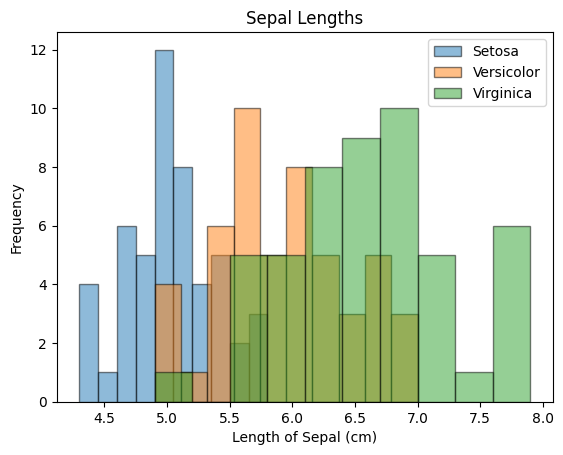

In [15]:
# Histograms showing how the sepal lengths of each of the three unique types of iris compare:

#*************************************************************************************************************************************
# Sepal Lengths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
# I'm adding alpha = 0.5 because i want them to be partly transparent so i can see them all.
# the default is to use bins = 10, that separate the observations across 10 groups if possible,  
ax.hist(setosa_sepal_length, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_sepal_length, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_sepal_length, bins=10, edgecolor="black", label="Virginica", alpha=0.5)

# legend
ax.legend()

# axis titles
ax.set_xlabel("Length of Sepal (cm)")
ax.set_ylabel("Frequency")

# chart title
plt.title("Sepal Lengths")

#plt.show()
#plt.savefig("sepal_lengths.png")

The histogram for Setosa sepal lengths shows a grouping of only a few bars, and one very tall bar in the middle.  This suggests they are similar and the average is about 5 centimetres. For Versicolor, the data is slightly more spread out, however still the taller bars in the middle suggest the average is about 5.6. Finally, Virginica has the most spread data, so perhaps the avergage would be about 6.6.

Text(0.5, 1.0, 'Sepal Widths')

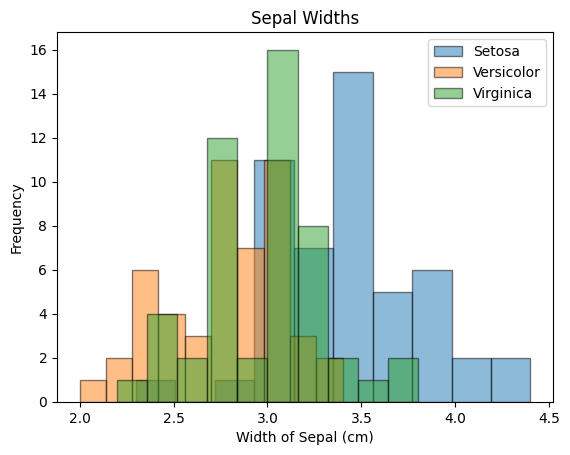

In [16]:
# Histograms showing how the sepal widths of each of the three unique types of iris compare:

#*************************************************************************************************************************************
# Sepal Widths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
ax.hist(setosa_sepal_width, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_sepal_width, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_sepal_width, bins=10, edgecolor="black", label="Virginica", alpha=0.5)

# legend
ax.legend()

# axis titles
ax.set_xlabel("Width of Sepal (cm)")
ax.set_ylabel("Frequency")

# chart title
plt.title("Sepal Widths")

#plt.show()
#plt.savefig("sepal_widths.png")

The histogram for Setosa sepal widths shows a grouping of only a few bars but unlike the previous case, in this case the Setoa sepal is the largest. It has one very tall bar in the middle.  This suggests they are similar and the average width is about 3.5 centimetres. For Versicolor, the data is slightly more spread out, some high bars and some low bars. However still the taller bars in the middle suggest the average is about 3.0. Finally, Virginica which while not as spread as Versicolor, its bars are all shorter. Perhaps the avergage would be about 2.75.

Text(0.5, 1.0, 'Petal Lengths')

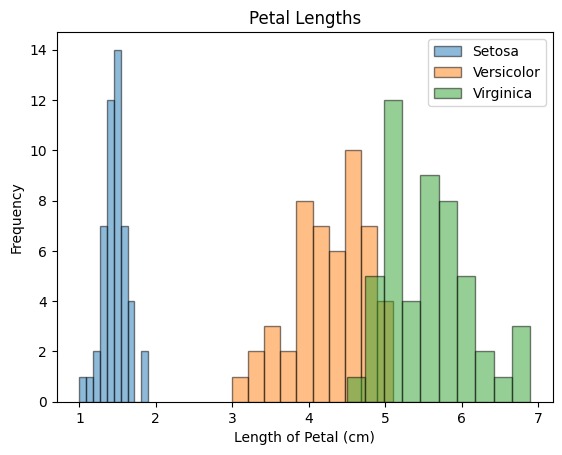

In [17]:
# Histograms showing how the petal lengths of each of the three unique types of iris compare:

#*************************************************************************************************************************************
# Petal Lengths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
ax.hist(setosa_petal_length, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_petal_length, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_petal_length, bins=10, edgecolor="black", label="Virginica", alpha=0.5)

# legend
ax.legend()

# axis titles
ax.set_xlabel("Length of Petal (cm)")
ax.set_ylabel("Frequency")

# chart title
plt.title("Petal Lengths")

#plt.show()
#plt.savefig("petal_lengths.png")

The histogram for Setosa sepal widths shows a very narrow grouping of only a few bars. It has two very tall bars in the middle.  This suggests they are similar and the average length is about 1.5 centimetres. For Versicolor, the data is slightly more spread out, some high bars and some low bars. However still the taller bars towards the right suggest the average is about 4.5. Finally, Virginica which is more spread than Versicolor, perhaps its avergage would be about 5.75.

Text(0.5, 1.0, 'Petal Widths')

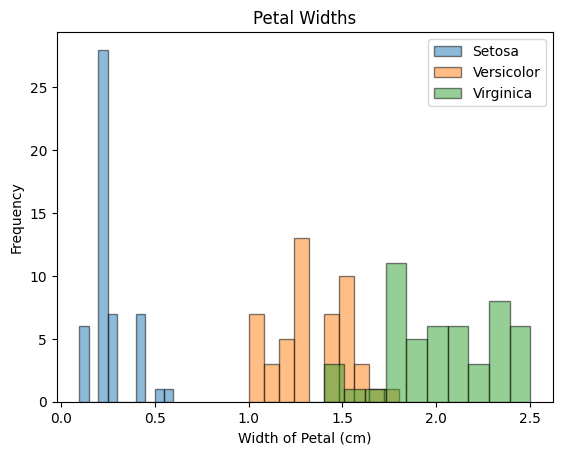

In [18]:
# Our histograms showing how the petal widths of each of the three unique types of iris compare:

#*************************************************************************************************************************************
# Petal Widths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
ax.hist(setosa_petal_width, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_petal_width, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_petal_width, bins=10, edgecolor="black", label="Virginica", alpha=0.5)

# legend
ax.legend()

# axis titles
ax.set_xlabel("Width of Petal (cm)")
ax.set_ylabel("Frequency")

# chart title
plt.title("Petal Widths")

#plt.show()
#plt.savefig("petal_widths.png")

The histogram for Setosa sepal widths shows a very narrow grouping and even fewer bars than before. It has one very tall bar in the middle.  This suggests they are extremely similar and the average length is about 0.25 centimetres. For Versicolor, the data is slightly more spread out, its bars being much lower. The average looks to be about 1.15. Finally, Virginica which is more spread than Versicolor, again very short bars, perhaps its avergage would be about 2.15.

## Task 5: Investigate Relationships

A scatter plot can show the relationship between the length of a petal and its width and how consistent it is across all three types of iris.

Text(0.5, 1.0, 'Relationship between Petal Widths & Lengths')

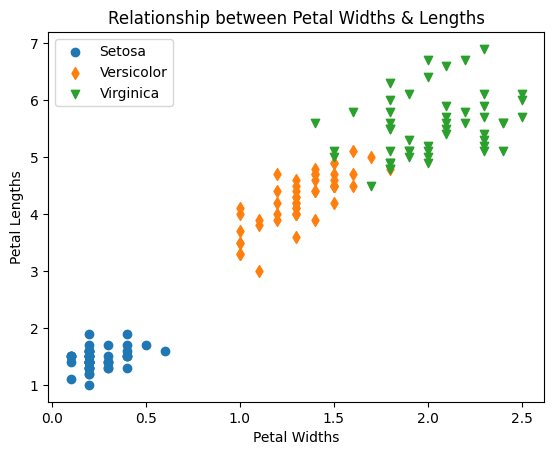

In [19]:
# ************************************************************************************************************************************************
# Petal Lengths vs Petal Widths (Scatter Plot)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(setosa_petal_width,setosa_petal_length, marker="o",label="Setosa")
ax.scatter(versicolor_petal_width,versicolor_petal_length,marker="d", label="Versicolor")
ax.scatter(virginica_petal_width,virginica_petal_length,marker="v", label="Virginica")

# Labels
ax.set_xlabel("Petal Widths")
ax.set_ylabel("Petal Lengths")

# legend
ax.legend()

# title
plt.title("Relationship between Petal Widths & Lengths")

#plt.show()
#plt.savefig("petal_lengths_vs_petal_widths.png")



In my opinion, there is a strong positive relationship between the petal's length and width for all three classes. In fact, visually, it looks like you could almost draw the same fitted line through all three sets of observations. I will look at this soon to see if such a fitted line is similar for all three classes of iris.

Similiar to above, I'm looking at relationship between the length of a sepal and its width and if it is consistent across all three types of iris.

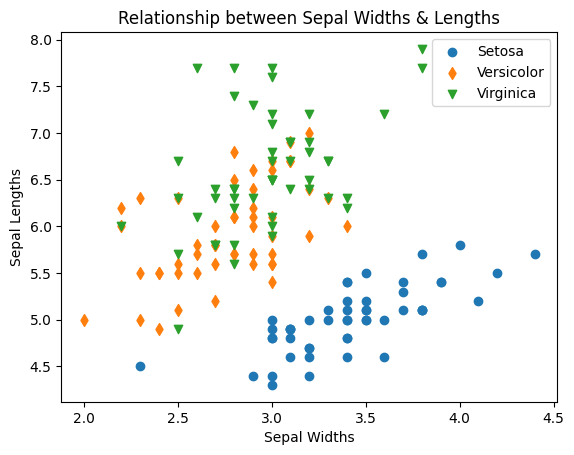

In [20]:
# ************************************************************************************************************************************************
# Sepal Lengths vs Sepal Widths (Scatter Plot)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(setosa_sepal_width,setosa_sepal_length, marker="o",label="Setosa")
ax.scatter(versicolor_sepal_width,versicolor_sepal_length,marker="d", label="Versicolor")
ax.scatter(virginica_sepal_width,virginica_sepal_length,marker="v", label="Virginica")

# Labels
ax.set_xlabel("Sepal Widths")
ax.set_ylabel("Sepal Lengths")

# legend
ax.legend()

plt.title("Relationship between Sepal Widths & Lengths")
#plt.show()
plt.savefig("sepal_lengths_vs_sepal_widths.png")

In the case of the sepal, the data for each sample shows more variance, for sure they will have very different fitted lines, at least in terms of their intercept. It would more difficult to distinguish between the classes of iris based on their sepal widths/lengths but definitely the Setosa class would be the easier to distinguish from the other two classes of iris.

## Task 6: Analyze Relationship

Quite clearly from the charts above, there is a positive relationship in all classes of iris across both petals and sepals. 
I will try and fit a line through all three classes of iris combined and check its slope to confirm.


In [21]:
# From https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html, 
# "Numpy Polyfit fits a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
# It returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0"
# This is what i want, a line which when drawn through the data, on average the observations both above and below will equate

# ************************************************************************************************************************************************
# Petal Lengths vs Petal Widths (Regression line)
# ***************************************************************************************************************************************************

# To the polyfit function, pass both arrays, and request one degree of the fitted line, (one degree as it is line not a U-shaped or n-shaped curve).
# Polyfit returns the slope and the intercept
setosa_petal_coefficients = np.polyfit(setosa_petal_width, setosa_petal_length, 1) # this gives an array containing two values, the slope and the intercept
versicolor_petal_coefficients = np.polyfit(versicolor_petal_width, versicolor_petal_length, 1) # this gives an array containing two values, the slope and the intercept
virginica_petal_coefficients = np.polyfit(virginica_petal_width, virginica_petal_length, 1) # this gives an array containing two values, the slope and the intercept

# now print out our regression lines for each class of iris, again for visual purposes i'm rounding the values 
print(f"\nSetosa:\t\t y = {round(setosa_petal_coefficients[0],2)}x + {round(setosa_petal_coefficients[1],2)}")
print(f"Versicolor:\t y = {round(versicolor_petal_coefficients[0],2)}x + {round(versicolor_petal_coefficients[1],2)}")
print(f"Virginica:\t y = {round(virginica_petal_coefficients[0],2)}x + {round(virginica_petal_coefficients[0],2)}")

# I know the slope and intercept coefficients of our line, I can now create y-coordinates for each point along the regression line (f) by feeding in the x-axis values.
f_setosa_petal = np.polyval(setosa_petal_coefficients,setosa_petal_width)
f_versicolor_petal = np.polyval(versicolor_petal_coefficients,versicolor_petal_width)
f_virginica_petal = np.polyval(virginica_petal_coefficients,virginica_petal_width)

# show f, which is the y-coordinates of our line through our scaterplot 
#print (f"\nThe y-coordinates for equation of a line for Setosa are:\n {f_setosa_petal}\n")
#print (f"The y-coordinates for equation of a line for Versicolor are:\n {f_versicolor_petal}\n")
#print (f"The y-coordinates for equation of a line for Virginica are:\n{f_virginica_petal}")




Setosa:		 y = 0.5x + 1.34
Versicolor:	 y = 1.87x + 1.78
Virginica:	 y = 0.65x + 0.65


In [22]:
# show our actual y-values so I can see how they compare with f

#print (f"\nThe actual y-coordinates for Setosa are:\n {setosa_petal_length}\n")
#print (f"The actual y-coordinates for Versicolor are:\n {versicolor_petal_length}\n")
#print (f"The actual y-coordinates for Virginica are:\n{virginica_petal_length}")


Text(0.5, 1.0, 'Relationship between Petal Widths & Lengths')

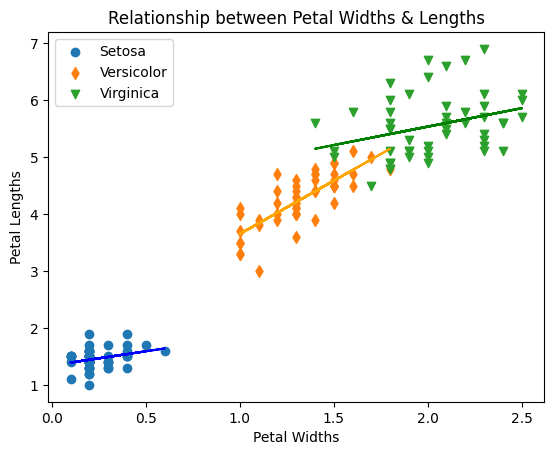

In [23]:
# Superimpose the regression line on the scatter plot of petal lengths against widths 

# ************************************************************************************************************************************************
# Petal Lengths vs Petal Widths (Scatter Plot & Regression Line)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

# Scatter plot of each class of iris, pyplot does the heavy lighting, i just supply it with the x and y values, 
# I'm choosing differ markers to simplify distinguising them, and i'm giving them a label
ax.scatter(setosa_petal_width,setosa_petal_length, marker="o",label="Setosa")
ax.scatter(versicolor_petal_width,versicolor_petal_length,marker="d", label="Versicolor")
ax.scatter(virginica_petal_width,virginica_petal_length,marker="v", label="Virginica")

# Regression line (f) of each class of iris, I'm giving each line a colour
ax.plot(setosa_petal_width, f_setosa_petal, color='blue')
ax.plot(versicolor_petal_width, f_versicolor_petal, color='orange')
ax.plot(virginica_petal_width, f_virginica_petal, color='green')

# Labels for axis
ax.set_xlabel("Petal Widths")
ax.set_ylabel("Petal Lengths")

# legend
ax.legend()

# title
plt.title("Relationship between Petal Widths & Lengths")

#plt.show()
#plt.savefig("petal_lengths_vs_petal_widths.png")



All three regression lines have a positive slope, but they are indeed very different lines. The slope of the Setosa line (0.5) looks visually similar to that of Viriginica (0.65), Versicolor is steeper (1.87). All three line differ greatly in terms of intercept.

In [24]:
# ************************************************************************************************************************************************
# Sepal Lengths vs Sepal Widths (Regression line)
# ***************************************************************************************************************************************************

# To the polyfit function, pass both arrays, and request one degree of the fitted line, (one degree as it is line not a U-shaped or n-shaped curve).
# Polyfit returns the slope and the intercept
setosa_sepal_coefficients = np.polyfit(setosa_sepal_width, setosa_sepal_length, 1) # this gives an array containing two values, the slope and the intercept
versicolor_sepal_coefficients = np.polyfit(versicolor_sepal_width, versicolor_sepal_length, 1) # this gives an array containing two values, the slope and the intercept
virginica_sepal_coefficients = np.polyfit(virginica_sepal_width, virginica_sepal_length, 1) # this gives an array containing two values, the slope and the intercept

# now print out our regression lines for each class of iris, again for visual purposes i'm rounding the values 
print(f"\nSetosa:\t\t y = {round(setosa_sepal_coefficients[0],2)}x + {round(setosa_sepal_coefficients[1],2)}")
print(f"Versicolor:\t y = {round(versicolor_sepal_coefficients[0],2)}x + {round(versicolor_sepal_coefficients[1],2)}")
print(f"Virginica:\t y = {round(virginica_sepal_coefficients[0],2)}x + {round(virginica_sepal_coefficients[0],2)}")

# I know the slope and intercept coefficients of our line, I can now create y-coordinates for each point along the regression line (f) by feeding in the x-axis values.
f_setosa_sepal = np.polyval(setosa_sepal_coefficients,setosa_sepal_width)
f_versicolor_sepal = np.polyval(versicolor_sepal_coefficients,versicolor_sepal_width)
f_virginica_sepal = np.polyval(virginica_sepal_coefficients,virginica_sepal_width)

# show f, which is the y-coordinates of our line through our scaterplot 
#print (f"\nThe y-coordinates for equation of a line for Setosa are:\n {f_setosa_sepal}\n")
#print (f"The y-coordinates for equation of a line for Versicolor are:\n {f_versicolor_sepal}\n")
#print (f"The y-coordinates for equation of a line for Virginica are:\n{f_virginica_sepal}")



Setosa:		 y = 0.69x + 2.64
Versicolor:	 y = 0.87x + 3.54
Virginica:	 y = 0.9x + 0.9


In [25]:
# show the actual y-values so I can see how they compare with f

#print (f"\nThe actual y-coordinates for Setosa are:\n {setosa_sepal_length}\n")
#print (f"The actual y-coordinates for Versicolor are:\n {versicolor_sepal_length}\n")
#print (f"The actual y-coordinates for Virginica are:\n{virginica_sepal_length}")

Text(0.5, 1.0, 'Relationship between Sepal Widths & Lengths')

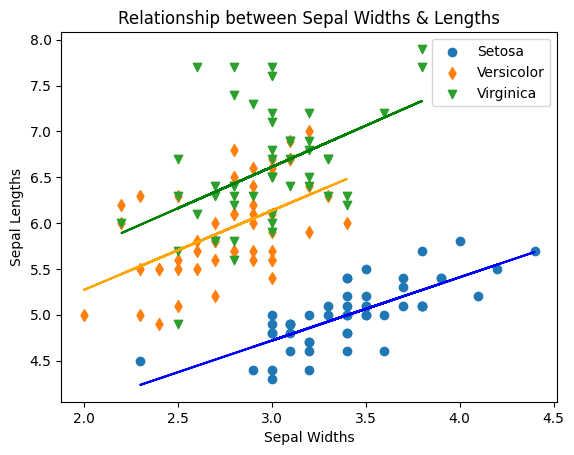

In [26]:
# superimpose the regression lines on the scatter plots for each class of iris.

# ************************************************************************************************************************************************
# Sepal Lengths vs Sepal Widths (Scatter Plot & Regression Line)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

# Scatter plot of each class of iris, pyplot does the heavy lighting, i just supply it with the x and y values, 
# I'm choosing differ markers to simplify distinguising them, and i'm giving them a label
ax.scatter(setosa_sepal_width,setosa_sepal_length, marker="o",label="Setosa")
ax.scatter(versicolor_sepal_width,versicolor_sepal_length,marker="d", label="Versicolor")
ax.scatter(virginica_sepal_width,virginica_sepal_length,marker="v", label="Virginica")

# Regression line (f) of each class of iris, I'm giving each line a colour
ax.plot(setosa_sepal_width, f_setosa_sepal, color='blue')
ax.plot(versicolor_sepal_width, f_versicolor_sepal, color='orange')
ax.plot(virginica_sepal_width, f_virginica_sepal, color='green')

#Labels
ax.set_xlabel("Sepal Widths")
ax.set_ylabel("Sepal Lengths")

# legend
ax.legend()

# title
plt.title("Relationship between Sepal Widths & Lengths")

#plt.show()
#plt.savefig("sepal_lengths_vs_sepal_widths.png")

Surprisingly, while the data for the sepals are more disperse, the slopes of the fitted lines are relatively similar, (0.69, 0.87, and 0.9) as can be seen visually in the chart. However, the intercepts are very different, which in my opinion, justifies separating out each of the classes or iris.

## Task 7: Analyze Class Distributions

I have created a box-plots of the petal lengths for each of the three classes. A boxplot is a chart that conveys a lot of information in a visually uncluttered and simple form.

- Each variable will have a box with an orange line. This orange line shows the median or the 50% percentile. 
- The bottom of the box is the 25% percentile, indicating that 25% of the values are less than that. 
- The top of the box is the 75% percentile, indicating that 25% of the values are above that. (50% of the values are in the box, 50% are outside, be it above or below)
- The whiskers either side of the box are calculated by subracting the value at the 25% percentile from the 75% percentile (the interquartile range),   
  and multiplying it by 1.5 either side of the box, and then letting it retreat back towards the box until it hits the nearest observation. The whisker length tells you how disperse the data is. 
- Observations outside the length of 1.5 x interquartile range, are referred to as outliers - they are indicated by circles above the top whisker   
  or below the bottom whisker. If they exist, they are the maximums and minimums, otherwise the end of the whiskers when they hit the nearest observations are the maximums and minimums. 

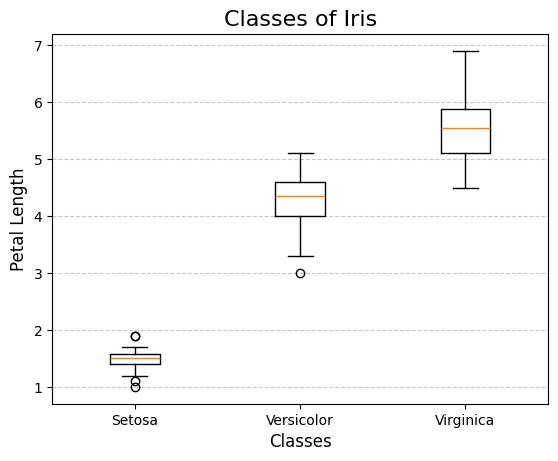

In [27]:
# *************************************************************************************************************************************************************
# *************** Box plots of Petal Lengths *************************************************************************************
# *************************************************************************************************************************************************************

# Create a numpy array comprising of three arrays, the Setosa petal length, the Versicolor petal length, and the Virginica petal length
petal_lengths = np.array([setosa_petal_length, versicolor_petal_length,virginica_petal_length])
#print(f"{petal_lengths}") # just want to see how it looks

# create figure, axis
fig, ax = plt.subplots()

# create boxplot, we will use .T because we need to transpose our data to make rows columns and columns rows because that's what the boxplot function expects)
ax.boxplot(petal_lengths.T)

# title
ax.set_title("Classes of Iris", fontsize=16)

# axis labels
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Petal Length", fontsize=12)

# set names of x-axis ticks, just puts the names on the horizontal axis
ax.set_xticks([1,2,3],["Setosa","Versicolor","Virginica"], fontsize=10)

# add a grid so we have horizontal dotted lines making it easier to see the values on the chart, alpha is how transparent the dotted lines are
ax.grid(axis="y", linestyle="--", alpha=0.7)

#plt.savefig("boxplot_of_petal_lengths.png")


The boxplots of petal lengths tell us that each of the classes are very different.

##### Medians 
Looking at the orange line, the Setosa petal median is around 1.5cms, while the Versicolor is about 4.5cms and the Virginica about 5.5cms. In all three, the orange line is in the middle of the boxes, so there is little skewness in the data for each of the classes.
##### Interquartile Ranges
The interquartile range for the Setosa is very tight, while it is relatively consistent between the Versicolor and Virginica, although the Virginica is still bigger. Given that the interquartile range says where 50% of the values lie, then we can say that the variance of the length of Setosa petal is much small than the other two. This was what was found when calculating the standard deviations earlier (Setosa 0.17, Versicolor 0.47, and Virginica 0.55)
##### Whiskers
The whiskers for the Setosa are very short, while the whiskers for the Virginica are the longest, suggesting the greatest variance in its data. Also, the lower whisker for the Versicolor is longer than its upper whisker suggesting it has observations at a further distance below the median than it has above the median, ignoring outliers. For Virginica, the opposite is the case, the upper whisker is longer than its lower whisker suggesting it has observations at a further distance above the median than it has below the median, ignoring outliers.
##### Outliers
There are some outliers above and below the whiskers for the Setosa class, not too far above and below it must be said. Given how tight the data is for Setosa, this is expected. For the Versicolor class, I already said how the lower whisker was longer than its upper whisker, well there is an outlier even below the bottom whisker.
##### Overlap
There is very little overlap between the three classes of iris, absolultely no overlap between Setosa and the other two. There is some overlap between high values of Versicolor against low values for Virginica. However, it is only the lower whisker of the Virginica, (that is 25%) that overlaps with the upper whisker of Versicolor and the top of the box (about 50% of Versicolor).
I would deduce from this boxplot, that the Setosa is very different class to the other two.

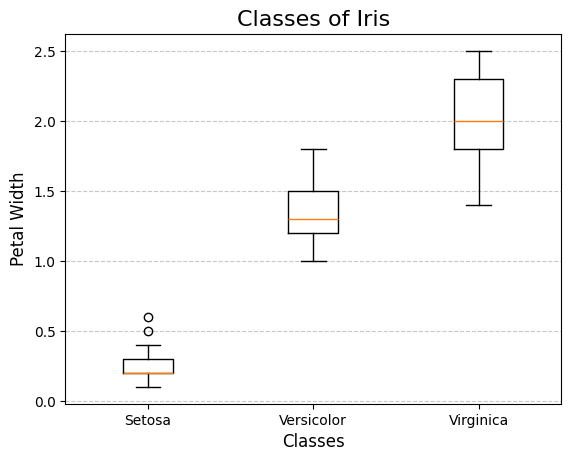

In [28]:
# *************************************************************************************************************************************************************
# *************** Box plots of Petal Widths *************************************************************************************
# *************************************************************************************************************************************************************

petal_widths=np.array([setosa_petal_width, versicolor_petal_width,virginica_petal_width])
#print(f"{petal_widths}") # just wanted to see how it looked

# create figure, axis
fig, ax = plt.subplots()

# create boxplot, we will use .T because we need to transpose our data to make rows columns and columns rows because thats what boxplot expect)
ax.boxplot(petal_widths.T)

# title
ax.set_title("Classes of Iris", fontsize=16)

# axis labels
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Petal Width", fontsize=12)

# set names of x-axis ticks, just puts the names on the horizontal axis 
ax.set_xticks([1,2,3],["Setosa","Versicolor","Virginica"], fontsize=10)

# add a grid so we have horizontal dotted lines making it easier to see the values on the chart, alpha is how transparent the dotted lines are
ax.grid(axis="y", linestyle="--", alpha=0.7)

#plt.savefig("boxplot_of_petal_widths.png")

The boxplots of petal widths tell us that each of the classes are very different.

##### Medians
Looking at the orange line, the Setosa petal median is around 0.25cms, while the Versicolor is about 1.4cms and the Virginica about 2.0cms.(From the summary statistics above, the setosa mean is 0.24, the versicolor is 1.33 and the Virginica is 2.03). For the setosa, the orange line is at the bottom of the box, indicating that its data is skewed, a quarter of the observations are compressed in the very bottom of the box, while a quarter fill the rest of the box. For the Versicolor, while the data is also skewed with the medican closer to the bottom of the box, the skewness is much lower. The Virginica, likewise, has only a small amount of skewness.
##### Interquartile Ranges
The interquartile range for the Setosa is again very tight. This time, the interquartile range for the Versicolor is much smaller than that of Virginica.  Given that the interquartile range says where 50% of the values lie, then it can be said that the variance of the width of Setosa petal is much small than the other two. The variance of the width of the Virginica petal is the greatest. This tallies with our standard deviations calculated previously (Setosa 0.11, Versicolor	0.2 and Virginica 0.27)
##### Whiskers
The whiskers for the Setosa are very short, while the whiskers for the Virginica are the longest, suggesting the greatest variance in its data. Also, the upper whisker for the Versicolor is longer than its lower whisker suggesting it has observations at a further distance above the median than it has above the median, ignoring outliers. For Virginica, the opposite is the case, the lower whisker is longer than its upper whisker suggesting it has observations at a further distance below the median than it has above the median, ignoring outliers.
##### Outliers
There are some outliers above the whiskers for the Setosa class (earlier in our summary statistics the maximum was 0.6). For the Versicolor and Virginica classes, there are no outliers.
##### Overlap
There is no overlap between Setosa and the other two classes of iris. There is some overlap between high values of Versicolor against low values for Virginica. However, it is only the lower whisker of the Virginica, (that is 25%) that overlaps with the upper part of the Versicolor box while the upper whisker of Versicolor only barely reaches the lower part of the box of Virginica.
I would deduce from this boxplot, that again the Setosa is very different class to the other two.

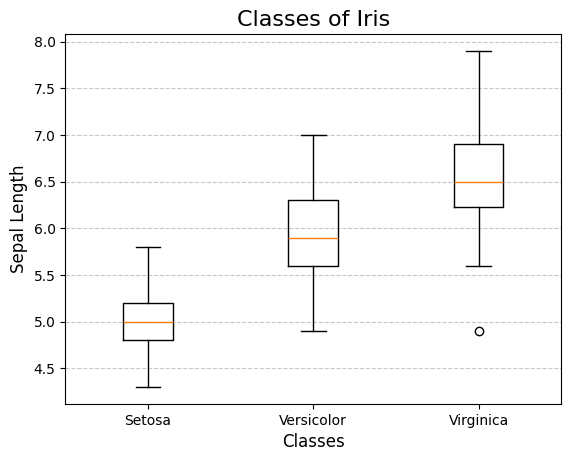

In [29]:
# *************************************************************************************************************************************************************
# *************** Box plots of Sepal Lengths *************************************************************************************
# *************************************************************************************************************************************************************

sepal_lengths=np.array([setosa_sepal_length, versicolor_sepal_length,virginica_sepal_length])
#print(petal_lengths)
# create figure, axis
fig, ax = plt.subplots()

# create boxplot, we will use .T because we need to transpose our data to make rows columns and columns rows because thats what boxplot expect)
ax.boxplot(sepal_lengths.T)

# title
ax.set_title("Classes of Iris", fontsize=16)

# axis labels
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Sepal Length", fontsize=12)

# set names of x-axis ticks, just puts the names on the horizontal axis 
ax.set_xticks([1,2,3],["Setosa","Versicolor","Virginica"], fontsize=10)

# add a grid so we have horizontal dotted lines making it easier to see the values on the chart, alpha is how transparent the dotted lines are
ax.grid(axis="y", linestyle="--", alpha=0.7)

#plt.savefig("boxplot_of_sepal_lengths.png")

The boxplots of sepal lengths shows that each of the classes are different but not as substantially different when comparing their petals.

##### Medians
Looking at the orange line, the Setosa sepal median is around 5cms, while the Versicolor is about 6cms and the Virginica about 6.5cms.(From the summary statistics above, the setosa mean is 5.01, the versicolor is 5.94 and the virginica is 6.59). For the setosa, the orange line is centre of the box, indicating that its data has little skewness. For the versicolor, while the data is also skewed with the medican closer to the bottom of the box, the skewness looks quite small. The virginica, likewise, has only a small amount of skewness to the lower part of its box.
##### Interquartile Ranges
The interquartile range for the Setosa is again very tight. This time, the interquartile range for the Versicolor is very similar to that of Virginica. Given that the interquartile range tells us where 50% of the values lie, it can be said that the variance of the width of Setosa petal is much small than the other two. Again this tallies with the standard deviations in the summary statistics calculated earlier (Setosa 0.35, Versicolor 0.51, and Virginica 0.63).
##### Whiskers
The whiskers for the Setosa are much longer than they were for its petals, in fact, they are similar to the whiskers for the Versicolor and Virginica, suggesting more variance in the sepal data. While the whiskers for Setosa and Versicolor are relatively consistent above and below their respective boxes, for Virginica, the upper whisker is longer than its lower whisker suggesting it has observations at a further distance above the median than it has below the median, ignoring outliers.
##### Outliers
There is an outlier well below the lower whisker for the Virginica class (we saw earlier in our summary statistics the minimum was 4.9). For the other two classes, there are no outliers.
##### Overlap
There is more overlap between Setosa and the other two classes of iris in this boxplot. There is some overlap between upper whiskers of Setosa against low values of Versicolor (box) and even Virginica (whiskers). Furthermore, upper box of the Versicolor, overlaps with the lower part of the Versicolor box.
I would deduce from this boxplot, that when it comes to their sepals, the classes are relatively closer to one another.

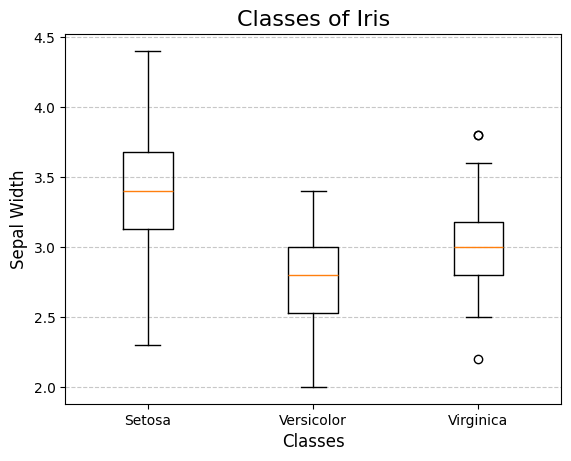

In [30]:
# *************************************************************************************************************************************************************
# *************** Box plots of Sepal Widths *************************************************************************************
# *************************************************************************************************************************************************************

sepal_widths=np.array([setosa_sepal_width, versicolor_sepal_width,virginica_sepal_width])
#print(petal_lengths)
# create figure, axis
fig, ax = plt.subplots()

# create boxplot, we will use .T because we need to transpose our data to make rows columns and columns rows because thats what boxplot expect)
ax.boxplot(sepal_widths.T)

# title
ax.set_title("Classes of Iris", fontsize=16)

# axis labels
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Sepal Width", fontsize=12)

# set names of x-axis ticks, just puts the names on the horizontal axis 
ax.set_xticks([1,2,3],["Setosa","Versicolor","Virginica"], fontsize=10)

# add a grid so we have horizontal dotted lines making it easier to see the values on the chart, alpha is how transparent the dotted lines are
ax.grid(axis="y", linestyle="--", alpha=0.7)

#plt.savefig("boxplot_of_sepal_widths.png")

The boxplots of sepal widths show very different conclusions to previous boxplots.

##### Medians
Looking at the orange line, the Setosa sepal median is around 3.4cms, while the Versicolor is about 2.75cms and the Virginica about 3.0cms.(From the summary statistics above, the setosa mean is 3.42, the versicolor is 2.77 and the virginica is 2.97). For all three boxes, the orange line is moreorless in the centre of the box, indicating the data has little skewness. 
##### Interquartile Ranges
The interquartile range for the Setosa is very similar to that of Versicolor and Virginica. In fact, in this case, Virginica looks to have the tightest box. Given that the interquartile range tells us where 50% of the values lie, it can be said that the variance of the width of Virginica sepal is as small as the other two. The standard deviations calculated in the summary statistics earlier back this up (Setosa 0.38, Versicolor 0.31, and Virginica 0.32)
##### Whiskers
The whiskers for the Setosa are much longer than they were for its petals, in fact, they are even longer than the whiskers for the Versicolor and Virginica, suggesting more variance in its sepal data. The lower whiskers for the Setosa and Versicolor are longer than their upper whiskers suggesting it has observations at a further distance below the median than it has above the median, ignoring outliers.
##### Outliers
There are outliers well below the lower whisker and well above the upper whisker for the Virginica class (we saw earlier in the summary statistics the minimum was 2.2 and maximum 3.8). For the other two classes, there are no outliers.
##### Overlap
There is more overlap between Setosa and the other two classes of iris in this boxplot. In fact, this is the first boxplot where the box for Setosa is far higher than the other two. There is some overlap between box for Versicolor and the box for Virginica. 
But, overall, I would deduce from this boxplot, that when it comes to their sepals widths, the classes are relatively closer to one another.


## Task 8: Compute Correlations

The correlation coefficients between the features shows how each of our variables correlate or move together with one another.


In [31]:
# ************************************************************************************************************************
# ****************** Correlation Coefficients ****************************************************************************
# ************************************************************************************************************************

# The correlation coefficient is a builtin function from pandas, (source: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/) 
# however from the dataset dataframe, only the numeric columns are applicable, not the alphabetical class column
# The alphabetical column is ignored by passing the "numeric_only=True" parameter in the correlation function (the default is Pearson's correlation which is fine)
print(f"\n{iris_df.corr(numeric_only=True,)}")



              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000



Correlation Coefficient Summary:

- Sepal length and sepal width have little or no correlation, at -0.1.  
- Petal length only has a small correlation with sepal width (circa 0.4).   
- Sepal length has a relatively large correlation with both petal length and petal width (circa 0.87 and 81, respectively).  
- Petal width has a very large correlation with petal length (circa 0.96).   

However, given the differences in the summary statistics across the classes of iris, 
the relationships between the features should be stronger if calculated for each class or iris.

In [32]:
# I'm just printing out the correlation coefficient again for the whole dataset for comparative purposes
# with the tables for each iris class
print(f"Iris\n{iris_df.corr(numeric_only=True,)}\n")

#print(f"{max_setosa}") # we calculated the maximum value above when creating the arrays
# we start at a minimum row of 0, up to row 50, that is, max_setosa

# so define our Setosa dataframe as the first 50 rows of the iris dataframe
setosa_df = iris_df[0:max_setosa]
#print(f"{setosa_df}")
print(f"Setosa\n{setosa_df.corr(numeric_only=True,)}")

# so define our Versicolor dataframe as the first 50-100 rows of the iris dataframe
versicolor_df = iris_df[max_setosa:max_versicolor]
#print(f"{versicolor_df}")
print(f"\nVersicolor\n{versicolor_df.corr(numeric_only=True,)}")

# so define our Virginica dataframe as the first 100-150 rows of the iris dataframe
virginica_df = iris_df[max_versicolor:max_virginica]
#print(f"{virginica_df}")
print(f"\nVirginica\n{virginica_df.corr(numeric_only=True,)}")



Iris
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

Setosa
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.746780      0.263874     0.279092
sepal_width       0.746780     1.000000      0.176695     0.279973
petal_length      0.263874     0.176695      1.000000     0.306308
petal_width       0.279092     0.279973      0.306308     1.000000

Versicolor
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.525911      0.754049     0.546461
sepal_width       0.525911     1.000000      0.560522     0.663999
petal_length      0.754049     0.560522      1.000000     0.786668
petal_width       0.546461     0.6639

Correlation Coefficient Summary: Setosa  
Relative to the overall iris classification, a massive difference in correlation can be seen between the sepal width and length for Setosa (from -0.10 to 0.75).
Likewise there was a large difference for petal length and sepal length (0.87 to 0.26), and petal width and sepal length (0.82 to 0.28). The relationship between the sepal width and petal length goes from a negative 0.42 to a positive 0.17, while that of petal width and sepal width goes from a negative relationship of 0.36 to a positive 0.28. Finally, it can be seen that the relationship between petal length and petal width goes from a massive 0.96 to a much lower 0.31.

Correlation Coefficient Summary: Versicolor  
Relative to the overall iris classification, a massive difference in correlation can be seen between the sepal width and length for Versicolor (from -0.10 to 0.52).
Likewise there was a large difference for petal length and sepal length (0.87 to 0.75), and petal width and sepal length (0.82 to 0.55). The relationship between the sepal width and petal length goes from a negative 0.42 to a positive 0.56, while that of petal width and sepal width goes from a negative relationship of 0.36 to a large positive of 0.66. Finally,  it can be seen that the relationship between petal length and petal width goes from a massive 0.96 to a more realistic 0.79.

Correlation Coefficient Summary: Virginica  
Relative to the overall iris classification, a massive difference in correlation can be seen between the sepal width and length for Virginica (from -0.10 to 0.45).
Likewise there was a small difference for petal length and sepal length (0.87 to 0.86), but large difference in the relationship between petal width and sepal length (0.82 to 0.28). Finally, the relationship between the petal length and petal width is much weaker. The relationship between the sepal width and petal length goes from a negative 0.42 to a positive 0.40, while that of petal width and sepal width goes from a negative relationship of 0.36 to a positive of 0.53. Finally, it can be seen that relationship between petal length and petal width goes from a massive 0.96 to a more modest 0.32.

The large swings in the correlations tells me that the corrleations between the features in the whole dataset are not as reliable as those within the classes.

In [33]:
#print(f"{max_versicolor}") # we calculated the maximum value above when creating the arrays
# the minimum this time is the max setosa row, bear in mind the field post, the name might be misleading, max setosa is really row 51 not 50


# let's now write it to an external text file so we can copy it into our report if needed
with open("correlation_coefficients.txt","w") as f:
     f.write("\n"+"\n"+"Iris"+"\n")
     f.write(str(iris_df.corr(numeric_only=True)))
     f.write("\n"+"\n"+"Setosa"+"\n")
     f.write(str(setosa_df.corr(numeric_only=True)))
     f.write("\n"+"\n"+"Versicolor"+"\n")
     f.write(str(versicolor_df.corr(numeric_only=True)))
     f.write("\n"+"\n"+"Virginica"+"\n")
     f.write(str(virginica_df.corr(numeric_only=True)))


#### Heatmaps

According to https://www.quanthub.com/how-to-read-a-correlation-heatmap/
> A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It’s like a color chart that shows us how closely related different variables are...Each variable is represented by a row and a column, and the cells show the correlation between them. The color of each cell represents the strength and direction of the correlation, with darker colors indicating stronger correlations.


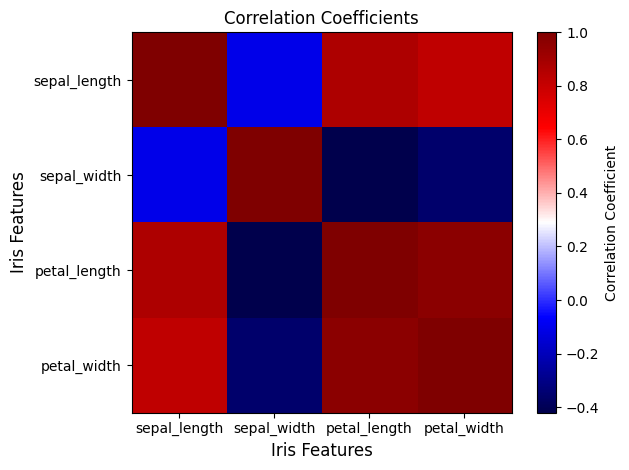

In [34]:

 #*************************************** Heat Map of Correlations **********************************************************
fig, ax = plt.subplots()

## Set our dataframe equal to the whole dataset
data = (iris_df.corr(numeric_only=True))

#these are what we want to check how they correlate
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


im = ax.imshow(data, cmap="seismic")
# choosing the color for color map - reference
        
# Some ideas for charts here https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap 
# and https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/ I found colorbar
# which is a legend for how strong the correlation is
plt.colorbar(im, label="Correlation Coefficient")

# Show all ticks and label them with the respective list entries
plt.xticks(range(len(data)), data.columns) 
plt.yticks(range(len(data)), data.columns) 

# axis labels
ax.set_xlabel("Iris Features", fontsize=12)
ax.set_ylabel("Iris Features", fontsize=12)

ax.set_title("Correlation Coefficients")
fig.tight_layout()
#plt.show()
#plt.savefig("heatmap_of_correlation_coefficients.png")


The heatmap just reinforces my earlier deductions of the relationship between the petal widths and lengths. Very strong between petal length and petal width. Also, there is strong correlation between petal length and sepal length.

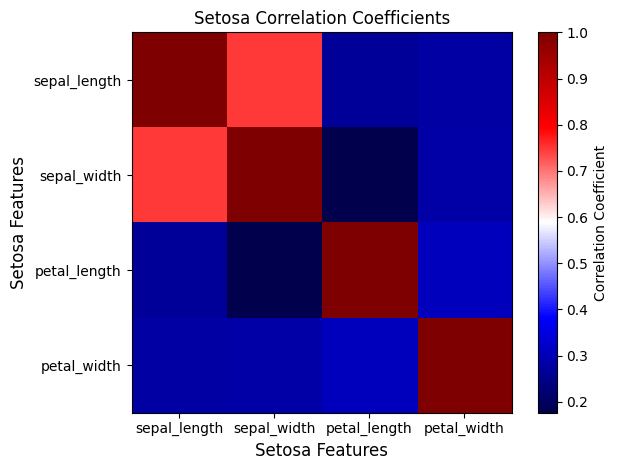

In [35]:
# Now to do a heatmap for each class of iris

 #*************************************** Heat Map of Correlations **********************************************************
fig, ax = plt.subplots()

## Set our dataframe equal to the Setosa dataset
data_setosa = (setosa_df.corr(numeric_only=True))

#these are what we want to check how they correlate
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


im = ax.imshow(data_setosa, cmap="seismic")
# choosing the color for color map - reference
        
# Some ideas for charts here https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap 
# and https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/ I found colorbar
# which is a legend for how strong the correlation is
plt.colorbar(im, label="Correlation Coefficient")

# Show all ticks and label them with the respective list entries
plt.xticks(range(len(data_setosa)), data_setosa.columns) 
plt.yticks(range(len(data_setosa)), data_setosa.columns) 

# axis labels
ax.set_xlabel("Setosa Features", fontsize=12)
ax.set_ylabel("Setosa Features", fontsize=12)

ax.set_title("Setosa Correlation Coefficients")
fig.tight_layout()
#plt.show()
#plt.savefig("heatmap_of_setosa_correlation_coefficients.png")


For Setosa, the heatmap shows there is some high correlation between the sepal length and sepal width. No significant correlation elsewhere.

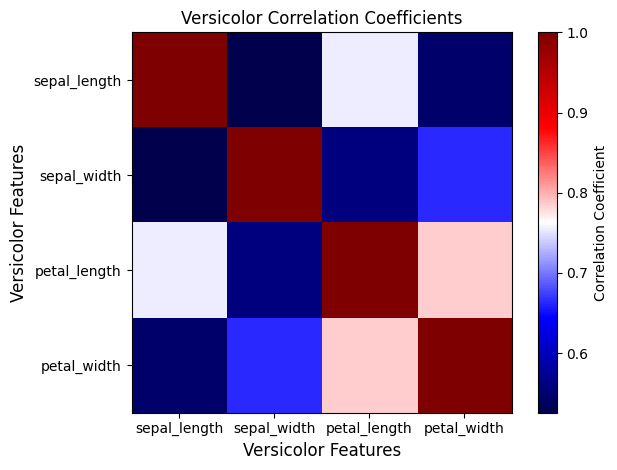

In [36]:

 #*************************************** Heat Map of Correlations **********************************************************
fig, ax = plt.subplots()

## Set our dataframe equal to the Versicolor dataset
data_versicolor = (versicolor_df.corr(numeric_only=True))

#these are what we want to check how they correlate
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


im = ax.imshow(data_versicolor, cmap="seismic")
# choosing the color for color map - reference
        
# Some ideas for charts here https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap 
# and https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/ I found colorbar
# which is a legend for how strong the correlation is
plt.colorbar(im, label="Correlation Coefficient")

# Show all ticks and label them with the respective list entries
plt.xticks(range(len(data_versicolor)), data_versicolor.columns) 
plt.yticks(range(len(data_versicolor)), data_versicolor.columns) 

# axis labels
ax.set_xlabel("Versicolor Features", fontsize=12)
ax.set_ylabel("Versicolor Features", fontsize=12)

ax.set_title("Versicolor Correlation Coefficients")
fig.tight_layout()
#plt.show()
#plt.savefig("heatmap_of_versicolor_correlation_coefficients.png")


For Versicolor, the heatmap shows there is little high correlation anywhere, maybe between the petal length and petal width but nothing significant. What is does highlight is the little correlation there is between the petal width and sepal length.

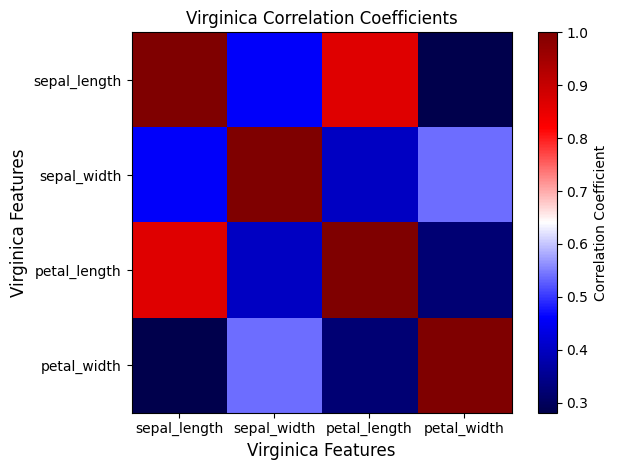

In [37]:
#*************************************** Heat Map of Correlations **********************************************************
fig, ax = plt.subplots()

## Set our dataframe equal to the Virginica dataset
data_virginica = (virginica_df.corr(numeric_only=True))

#these are what we want to check how they correlate
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


im = ax.imshow(data_virginica, cmap="seismic")
# choosing the color for color map - reference
        
# Some ideas for charts here https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap 
# and https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/ I found colorbar
# which is a legend for how strong the correlation is
plt.colorbar(im, label="Correlation Coefficient")

# Show all ticks and label them with the respective list entries
plt.xticks(range(len(data_virginica)), data_virginica.columns) 
plt.yticks(range(len(data_virginica)), data_virginica.columns) 

# axis labels
ax.set_xlabel("Virginica Features", fontsize=12)
ax.set_ylabel("Virginica Features", fontsize=12)

ax.set_title("Virginica Correlation Coefficients")
fig.tight_layout()
#plt.show()
#plt.savefig("heatmap_of_virginica_correlation_coefficients.png")

For Virginica, the heatmap shows there is some correlation between the petal length and sepal length, but no significant correlation elsewhere. Similar to Versicolor, it does show there is no correlation between the petal width and sepal length.


A glance at the heatmaps for each class of iris immediately confirms that the heatmap for the whole dataset can be very misleading in terms of exaggerating the correlation coefficients. 

## Task 9: Fit a Simple Linear Regression

Perhaps, one of the best ways to determine how one variable correlates or explains another variable to be more accurate, is to measure the R-squared. From https://corporatefinanceinstitute.com/resources/data-science/r-squared/, R-squared - or the coefficient of determination - can be defined as:
> a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.  

An R-squared can take any value between 0 to 1, so for example, an R-squared of 0.70 says that 70% of the variability observed in the dependent (y-axis) variable is explained by the regression model.

Setosa Petal Length = b*Setosa Petal Width
Slope is:	0.5
Intercept is:	1.34
R-Squared is:	0.093825
P-value is:	0.03
Std Error is:	0.22

Versicolor Petal Length = b*Versicolor Petal Width
Slope is:	1.87
Intercept is:	1.78
R-Squared is:	0.618847
P-value is:	0.0
Std Error is:	0.21

Virginica Petal Length = b*Virginica Petal Width
Slope is:	0.65
Intercept is:	4.24
R-Squared is:	0.103754
P-value is:	0.02
Std Error is:	0.27


Text(0.5, 1.0, 'Relationship between Petal Widths & Lengths')

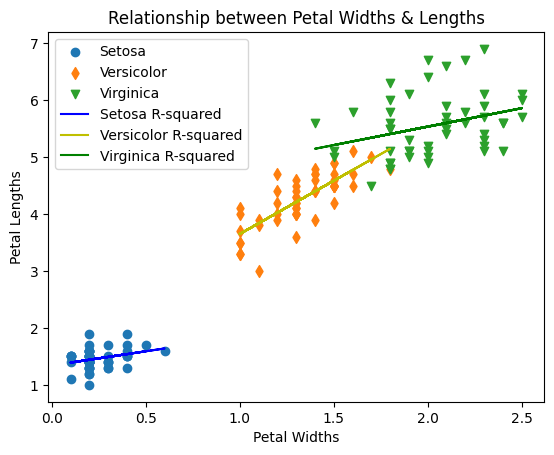

In [38]:
#****************************************************************************************************************************
#******************************** R-Squared for Petals ********************************************************************************
#****************************************************************************************************************************

# Using the linear regression model approach https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 

fig, ax = plt.subplots()

#Scatter plot
ax.scatter(setosa_petal_width,setosa_petal_length, marker="o",label="Setosa")
ax.scatter(versicolor_petal_width,versicolor_petal_length,marker="d", label="Versicolor")
ax.scatter(virginica_petal_width,virginica_petal_length,marker="v", label="Virginica")

#plt.plot(setosa_petal_width, setosa_petal_length, 'o', label='original data')
#plt.plot(versicolor_petal_width, versicolor_petal_length, 'o', label='original data')
#plt.plot(virginica_petal_width, virginica_petal_length, 'o', label='original data')

fit_setosa_petal = sp.stats.linregress(setosa_petal_width, setosa_petal_length)
# From https://docs.scipy.org, the variables returned from stats.linregress(setosa_petal_width, setosa_petal_length) are slope, intercept, r_value, p_value, std_err.
# The r_value is no good, want r-squared, so i will square it.
# again for display purposes, i am rounding many of the values
print(f"Setosa Petal Length = b*Setosa Petal Width\nSlope is:\t{round(fit_setosa_petal.slope,2)}\nIntercept is:\t{round(fit_setosa_petal.intercept,2)}\nR-Squared is:\t{round(fit_setosa_petal.rvalue**2,6)}\nP-value is:\t{round(fit_setosa_petal.pvalue,2)}\nStd Error is:\t{round(fit_setosa_petal.stderr,2)}")
# plot the graph by supplying the x axis value, and the y axis value  given by the equation of the line y = mx +c 
plt.plot(setosa_petal_width, fit_setosa_petal.intercept + fit_setosa_petal.slope*setosa_petal_width, 'b', label='Setosa R-squared')
      
fit_versicolor_petal = sp.stats.linregress(versicolor_petal_width, versicolor_petal_length)
# The r_value is no good, want r-squared, so i will square it.
print(f"\nVersicolor Petal Length = b*Versicolor Petal Width\nSlope is:\t{round(fit_versicolor_petal.slope,2)}\nIntercept is:\t{round(fit_versicolor_petal.intercept,2)}\nR-Squared is:\t{round(fit_versicolor_petal.rvalue**2,6)}\nP-value is:\t{round(fit_versicolor_petal.pvalue,2)}\nStd Error is:\t{round(fit_versicolor_petal.stderr,2)}")
plt.plot(versicolor_petal_width, fit_versicolor_petal.intercept + fit_versicolor_petal.slope*versicolor_petal_width, 'y', label='Versicolor R-squared')

fit_virginica_petal = sp.stats.linregress(virginica_petal_width, virginica_petal_length)
# The r_value is no good, want r-squared, so i will square it.
print(f"\nVirginica Petal Length = b*Virginica Petal Width\nSlope is:\t{round(fit_virginica_petal.slope,2)}\nIntercept is:\t{round(fit_virginica_petal.intercept,2)}\nR-Squared is:\t{round(fit_virginica_petal.rvalue**2,6)}\nP-value is:\t{round(fit_virginica_petal.pvalue,2)}\nStd Error is:\t{round(fit_virginica_petal.stderr,2)}")
plt.plot(virginica_petal_width, fit_virginica_petal.intercept + fit_virginica_petal.slope*virginica_petal_width, 'g', label='Virginica R-squared')

# legend
ax.legend()
plt.legend()

#Labels
ax.set_xlabel("Petal Widths")
ax.set_ylabel("Petal Lengths")

# title
plt.title("Relationship between Petal Widths & Lengths")

#plt.savefig("Fitted_Line_on_petal_length_vs_petal_width.png")


These slopes and intercepts match what I found earlier. They also visually look correct.
Unfortunately, the explanatory power of the petal widths in determining the size of the petal lengths is disaapointing for Setosa (0.09) and Virginica(0.10). For Versicolor, an R-squared of 0.62 is quite good, explaining over 60% of the petal length. Interestingly, all their standard erros are consistent at around 0.2.

In [39]:
# Just to double-check our results for R-squared
ss_res_setosa = np.sum((setosa_petal_length - f_setosa_petal)**2)
ss_res_versicolor = np.sum((versicolor_petal_length - f_versicolor_petal)**2)
ss_res_virginica = np.sum((virginica_petal_length - f_virginica_petal)**2)

# Show
# print(f"{ss_res_setosa}")
# print(f"{ss_res_versicolor}")
# print(f"{ss_res_virginica}\n")

# Mean of petal_length
setosa_petal_length_bar = np.mean(setosa_petal_length)
versicolor_petal_length_bar = np.mean(versicolor_petal_length)
virginica_petal_length_bar = np.mean(virginica_petal_length)

# show
# print(f"{setosa_petal_length_bar}")
# print(f"{versicolor_petal_length_bar}")
# print(f"{virginica_petal_length_bar}\n")

# Total sum of squares
ss_tot_setosa = np.sum((setosa_petal_length - setosa_petal_length_bar)**2)
ss_tot_versicolor = np.sum((versicolor_petal_length - versicolor_petal_length_bar)**2)
ss_tot_virginica = np.sum((virginica_petal_length - virginica_petal_length_bar)**2)

#show
# print(f"{ss_tot_setosa}")
# print(f"{ss_tot_versicolor}")
# print(f"{ss_tot_virginica}\n")

# ratio
# print(f"ss_re/ss_tot = {ss_res_setosa/ss_tot_setosa}")
# print(f"ss_re/ss_tot = {ss_res_versicolor/ss_tot_versicolor}")
# print(f"ss_re/ss_tot = {ss_res_virginica/ss_tot_virginica}\n")

# R^2 value
print(f"R-squared= {1.0 - (ss_res_setosa / ss_tot_setosa)}")
print(f"R-squared= {1.0 - (ss_res_versicolor / ss_tot_versicolor)}")
print(f"R-squared= {1.0 - (ss_res_virginica / ss_tot_virginica)}")


R-squared= 0.09382472022283583
R-squared= 0.6188466815001423
R-squared= 0.10375370275048623


These R-Squares match what I calculated using scipy.stats.linregress


Setosa Sepal Length = b*Setosa Sepal Width
Slope is:	0.69
Intercept is:	2.64
R-Squared is:	0.557681
P-value is:	0.0
Std Error is:	0.09

Versicolor Sepal Length = b*Versicolor Sepal Width
Slope is:	0.87
Intercept is:	3.54
R-Squared is:	0.276582
P-value is:	0.0
Std Error is:	0.2

Virginica Sepal Length = b*Virginica Sepal Width
Slope is:	0.9
Intercept is:	3.91
R-Squared is:	0.209057
P-value is:	0.0
Std Error is:	0.25


Text(0.5, 1.0, 'Relationship between Sepal Widths & Lengths')

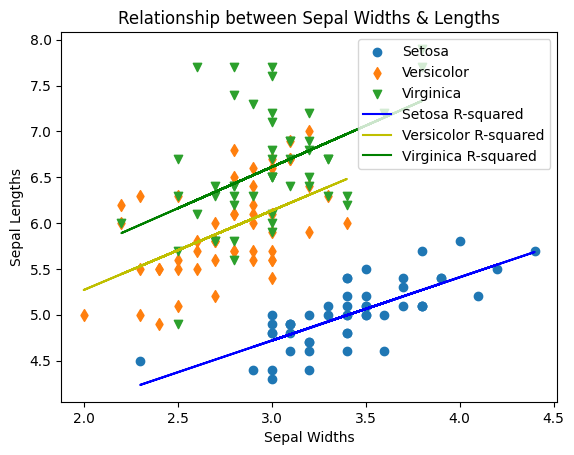

In [40]:
#****************************************************************************************************************************
#******************************** R-Squared for Sepals ********************************************************************************
#****************************************************************************************************************************

# Using the linear regression model approach as seen here https://stackoverflow.com/questions/28753502/scipy-stats-linregress-get-p-value-of-intercept
# and https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
# must be in the form of linregress(x variable, y=variable)

fig, ax = plt.subplots()

#Scatter plot
ax.scatter(setosa_sepal_width,setosa_sepal_length, marker="o",label="Setosa")
ax.scatter(versicolor_sepal_width,versicolor_sepal_length,marker="d", label="Versicolor")
ax.scatter(virginica_sepal_width,virginica_sepal_length,marker="v", label="Virginica")

#plt.plot(setosa_sepal_width, setosa_sepal_length, 'o', label='original data')
#plt.plot(versicolor_sepal_width, versicolor_sepal_length, 'd', label='original data')
#plt.plot(virginica_sepal_width, virginica_sepal_length, 'o', label='original data')

fit_setosa_sepal = sp.stats.linregress(setosa_sepal_width, setosa_sepal_length)
# from https://docs.scipy.org, the variables returned from stats.linregress(setosa_petal_width, setosa_petal_length) are slope, intercept, r_value, p_value, std_err.
# The r_value is no good, want r-squared, so i will square it.
print(f"\nSetosa Sepal Length = b*Setosa Sepal Width\nSlope is:\t{round(fit_setosa_sepal.slope,2)}\nIntercept is:\t{round(fit_setosa_sepal.intercept,2)}\nR-Squared is:\t{round(fit_setosa_sepal.rvalue**2,6)}\nP-value is:\t{round(fit_setosa_sepal.pvalue,2)}\nStd Error is:\t{round(fit_setosa_sepal.stderr,2)}")
plt.plot(setosa_sepal_width, fit_setosa_sepal.intercept + fit_setosa_sepal.slope*setosa_sepal_width, 'b', label='Setosa R-squared')

fit_versicolor_sepal = sp.stats.linregress(versicolor_sepal_width, versicolor_sepal_length)
# The r_value is no good, want r-squared, so i will square it.
print(f"\nVersicolor Sepal Length = b*Versicolor Sepal Width\nSlope is:\t{round(fit_versicolor_sepal.slope,2)}\nIntercept is:\t{round(fit_versicolor_sepal.intercept,2)}\nR-Squared is:\t{round(fit_versicolor_sepal.rvalue**2,6)}\nP-value is:\t{round(fit_versicolor_sepal.pvalue,2)}\nStd Error is:\t{round(fit_versicolor_sepal.stderr,2)}")
plt.plot(versicolor_sepal_width, fit_versicolor_sepal.intercept + fit_versicolor_sepal.slope*versicolor_sepal_width, 'y', label='Versicolor R-squared')

fit_virginica_sepal = sp.stats.linregress(virginica_sepal_width, virginica_sepal_length)
# The r_value is no good, want r-squared, so i will square it.
print(f"\nVirginica Sepal Length = b*Virginica Sepal Width\nSlope is:\t{round(fit_virginica_sepal.slope,2)}\nIntercept is:\t{round(fit_virginica_sepal.intercept,2)}\nR-Squared is:\t{round(fit_virginica_sepal.rvalue**2,6)}\nP-value is:\t{round(fit_virginica_sepal.pvalue,2)}\nStd Error is:\t{round(fit_virginica_sepal.stderr,2)}")
plt.plot(virginica_sepal_width, fit_virginica_sepal.intercept + fit_virginica_sepal.slope*virginica_sepal_width, 'g', label='Virginica R-squared')

# legend
ax.legend()
plt.legend()

# Labels
ax.set_xlabel("Sepal Widths")
ax.set_ylabel("Sepal Lengths")

# title
plt.title("Relationship between Sepal Widths & Lengths")

#plt.savefig("Fitted_Line_on_sepal_length_vs_sepal_width.png")

These slopes and intercepts match what we found earlier. They also visually look correct.

The explanatory power of our sepal widths in determining the size of our sepal lengths is relatively weak for Versicolor (0.27) and Virginica(0.21). For Setosa, an R-squared of 0.56 is better, explaining over half of the sepal length. Futhermore, the standard error on the Setosa line is relatively low compared to the other two classes, many of the observations lie quite to the fitted line.

In [41]:
# Just to double-check our results for R-squared
ss_res_setosa_sepal = np.sum((setosa_sepal_length - f_setosa_sepal)**2)
ss_res_versicolor_sepal = np.sum((versicolor_sepal_length - f_versicolor_sepal)**2)
ss_res_virginica_sepal = np.sum((virginica_sepal_length - f_virginica_sepal)**2)

# Show
# print(f"{ss_res_setosa_sepal}")
# print(f"{ss_res_versicolor_sepal}")
# print(f"{ss_res_virginica_sepal}\n")

# Mean of sepal_length
setosa_sepal_length_bar = np.mean(setosa_sepal_length)
versicolor_sepal_length_bar = np.mean(versicolor_sepal_length)
virginica_sepal_length_bar = np.mean(virginica_sepal_length)

# show the mean sepal length
# print(f"{setosa_petal_length_bar}")
# print(f"{versicolor_petal_length_bar}")
# print(f"{virginica_petal_length_bar}\n")

# Total sum of squares
ss_tot_setos_sepal = np.sum((setosa_sepal_length - setosa_sepal_length_bar)**2)
ss_tot_versicolor_sepal = np.sum((versicolor_sepal_length - versicolor_sepal_length_bar)**2)
ss_tot_virginica_sepal = np.sum((virginica_sepal_length - virginica_sepal_length_bar)**2)

#show
# print(f"{ss_tot_setos_sepal}")
# print(f"{ss_tot_versicolor_sepal}")
# print(f"{ss_tot_virginica_sepal}\n")

# ratio 
# print(f"ss_re/ss_tot = {ss_res_setosa_sepal/ss_tot_setos_sepal}")
# print(f"ss_re/ss_tot = {ss_res_versicolor_sepal/ss_tot_versicolor_sepal}")
# print(f"ss_re/ss_tot = {ss_res_virginica_sepal/ss_tot_virginica_sepal}\n")

# R^2 value
print(f"R-squared= {1.0 - (ss_res_setosa_sepal / ss_tot_setos_sepal)}")
print(f"R-squared= {1.0 - (ss_res_versicolor_sepal / ss_tot_versicolor_sepal)}")
print(f"R-squared= {1.0 - (ss_res_virginica_sepal / ss_tot_virginica_sepal)}")

R-squared= 0.5576809258922096
R-squared= 0.27658208255293515
R-squared= 0.20905727608452884


These R-Squares match what I calculated using scipy.stats.linregress

## Task 10: Too Many Features

There is a lot of data to spread across many graphs. Thankfully, it's possible to summarise many of these graphs into one, called a pairplot.

According to https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/

> “A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset’s distributions and correlations. The primary purpose of a pair plot is to simplify the initial stages of data analysis by offering a comprehensive snapshot of potential relationships within the data.”  

> They enable data scientists to:  
- Visualize distributions: Understand the distribution of single variables.  
- Identify relationships: Observe linear or nonlinear relationships between variables.  
- Detect anomalies: Spot outliers that may indicate errors or unique insights.

> A pair plot consists of:

- Histograms: Diagonal plots showing the distribution of a single variable.
- Scatter plots: Off-diagonal plots showing the relationship between two variables. These can reveal patterns, trends, and correlations.


The seaborn package, which is a high-level visualization package based on matplotlib and integrated with pandas data structures, allows me to create a pairplot of the iris dataset.

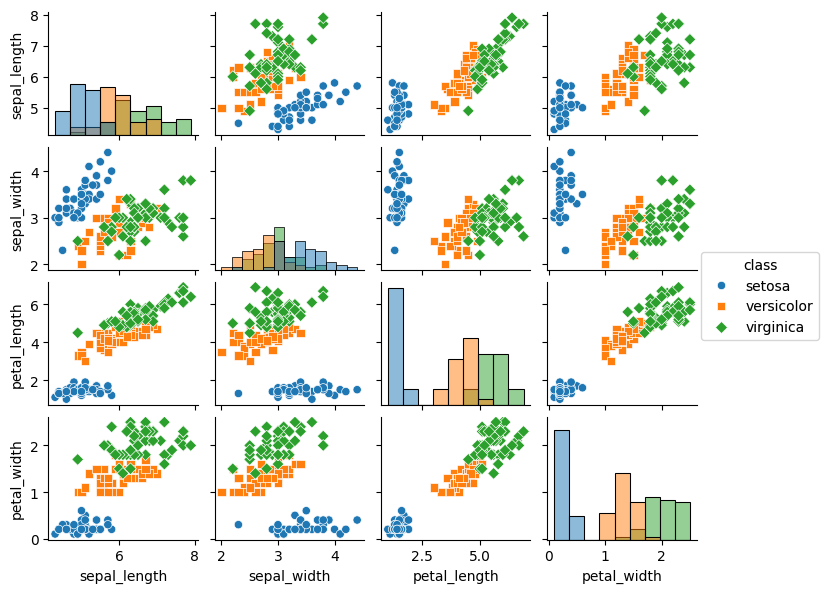

In [42]:
# ******************************************************************************************************************************************************
# *************************************** Pairplot **********************************************************************************************
# *****************************************************************************************************************************************************
# the following are based on examples from https://seaborn.pydata.org/generated/seaborn.pairplot.html 
# and https://seaborn.pydata.org/tutorial/introduction.html

g=sns.pairplot(iris_df,  x_vars=["sepal_length","sepal_width","petal_length","petal_width"],
    y_vars=["sepal_length","sepal_width","petal_length","petal_width"], hue="class",diag_kind="hist", markers=["o", "s", "D"], corner=False, height=1.5)
g.add_legend(frameon=True)
#plt.savefig("pairplot.png")

#### Conclusion  

Along the diagonal, lies the histograms showing the distributions of that particular feature, be it petal width, petal lengths, sepal widths, or sepal lengths. It can be seen that with respect to the sepal width, the values are all spread across several bars so the variance is high. The distribution is flatter, showing that the numerous samples of each class differ in size and the Setosa sepal width is greater than that of Versicolor or Virginica. With respect to petal length and width, a Setosa differs greatly in size to either the Versicolor or Virginica, the Setosa is much smaller. The one large bar and one small bar tells me that their size is typically that of the tall bar, whereas the other two have more varied sizes. 

With respect to the correlations, in the sepal length/petal width box, a positive relationship can be seen across all three classes of iris, starting  with Setosa in the bottom left, and working upwards to the top right with Virginica. It must be said, a very similar relationship is shown between the sepal length and the petal length. In the case of the sepal width and petal width, the relationship is almost negative. High values of sepal widths for setosa give low petal widths. Conversely, high petal widths or lengths see small sepal widths. Finally, looking at petal lengths, they look like that have an almost zero relationship with sepal widths or sepal lengths.

In summary, according to the description of the data on UC Irvine (https://archive.ics.uci.edu/dataset/53/iris),  
> one class is linearly separable from the other 2; the latter are not linearly separable from each other. 

For me, even a quick look at the pairplot, would tell me that the blue dots for Setosa are almost always situated away from the other two sets of green and orange dots (Virginica and Versicolor). So, I would agree with the description on the website, that one class (Setosa) can be linearly separable from the other two.

## End